# PRE-AUTHORIZATION APPROVAL/DENIAL PREDICTION MODEL

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import prettytable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import re
import seaborn as sns
from chart_studio.plotly import plotly
import matplotlib.pyplot as plt
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Data description

1. target:- The target value is '0' and '1' means approval and denial of a pre-authorization request filed to a Health Insurance or to its TPA who works behalf of the patients health insurance. 

2. clean_mod :- It represents a modification to the medical service given to the patient example: MRI needs to be performed by focusing a perticular body part.

3. gender : It represents the gender of the patient. 

4. Insurance_type:- It represents whether the health insurance is primary or secondary.

5. prefix:- It represents prefix attached to health insurance member ids.

6. actual_ins :- Patients health insurance name.

7. Ins_class :- It represent whether the patients health insurance is Non-financial or financial origanization.

8. cpt_description :- It represents the name of the medical procedure. 

9. icd_description :- It the diseases of the patient diagnosed by a doctor. 
10. pat_age : Patients age in days.

# Preprocessed Data

In [2]:
# This is a preprocesed and feature added data due to hippa complance I cant show on the notebook.
org_df_2 = pd.read_csv("D:\\AR\\org_data_2.csv")

In [3]:
# Fill nan mean of patient age in days.
# This is added as new feature added.
org_df_2['pat_age'].fillna(org_df_2['pat_age'].mean(),inplace=True)

In [4]:
# removing null cpt_description as it can't be filled because its a medical service performed to patients
org_df_2 = org_df_2[org_df_2['cpt_description'].notnull()]

In [5]:
org_df_2 = org_df_2[['target', 'clean_mod', 'gender', 'insurance_type',
       'prefix', 'actual_ins', 'Ins_class', 'cpt_description',
       'icd_description', 'pat_age']]

# Visualization of Data

## Modifier (clean_mod)

<AxesSubplot:title={'center':'clean Mod'}, ylabel='clean_mod'>

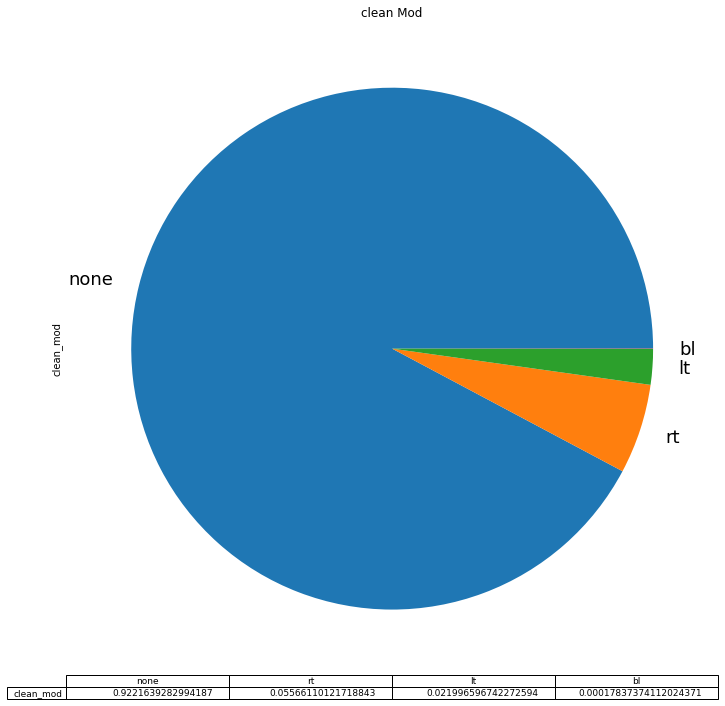

In [6]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
y=org_df_2['clean_mod'].value_counts()/org_df_2['clean_mod'].value_counts().sum()
(y).plot(y='Percentage',kind='pie',title='clean Mod',figsize =(12,12), fontsize=18, table=True)

## Gender

<AxesSubplot:title={'center':'gender'}, ylabel='gender'>

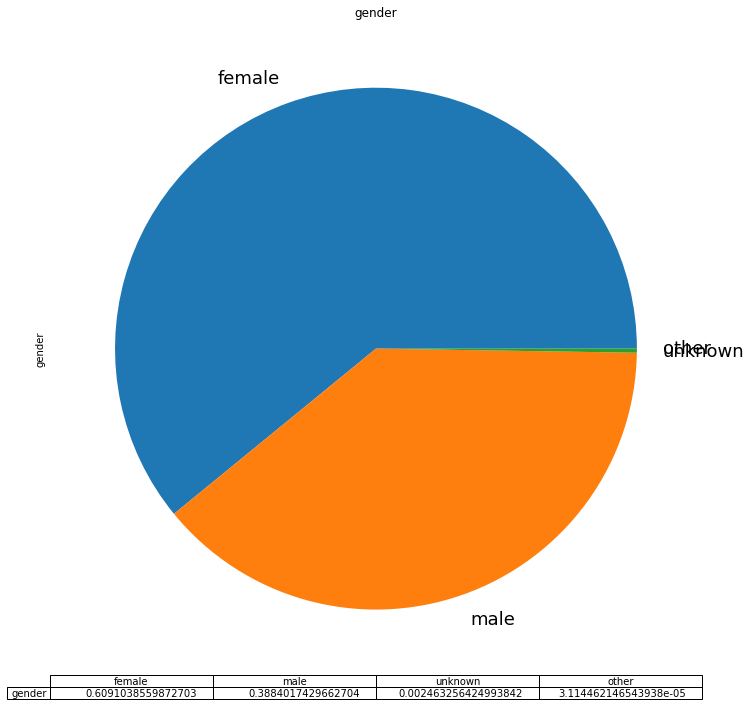

In [7]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
y=org_df_2['gender'].value_counts()/org_df_2['gender'].value_counts().sum()
(y).plot(y='Percentage',kind='pie',title='gender',figsize =(12,12), fontsize=18, table=True)

## Insurnce types

<AxesSubplot:title={'center':'insurance_type'}, ylabel='insurance_type'>

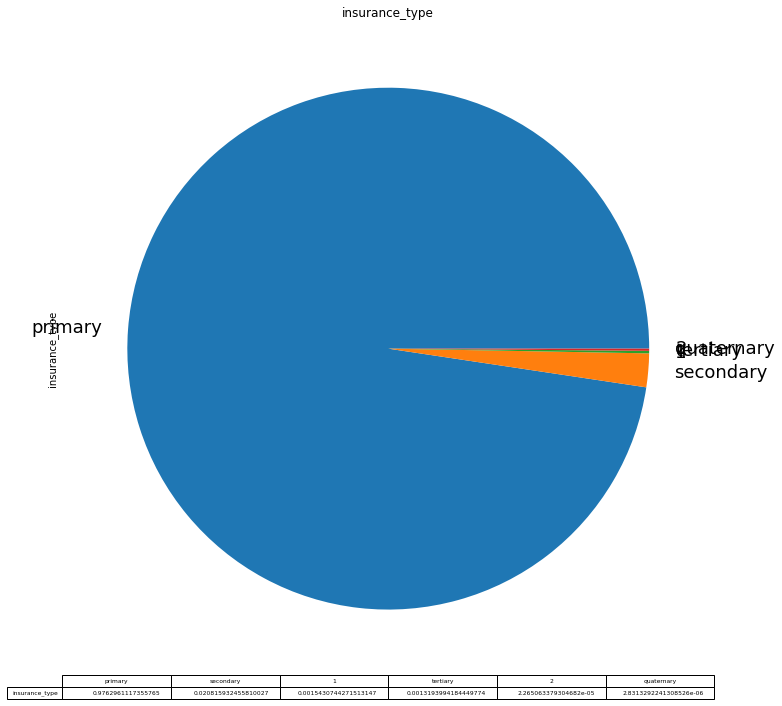

In [53]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
y=org_df_2['insurance_type'].value_counts()/org_df_2['insurance_type'].value_counts().sum()
(y).plot(y='Percentage',kind='pie',title='insurance_type',figsize =(12,12), fontsize=18, table=True)

## Insurance Type

<AxesSubplot:title={'center':'Ins_class'}, ylabel='Ins_class'>

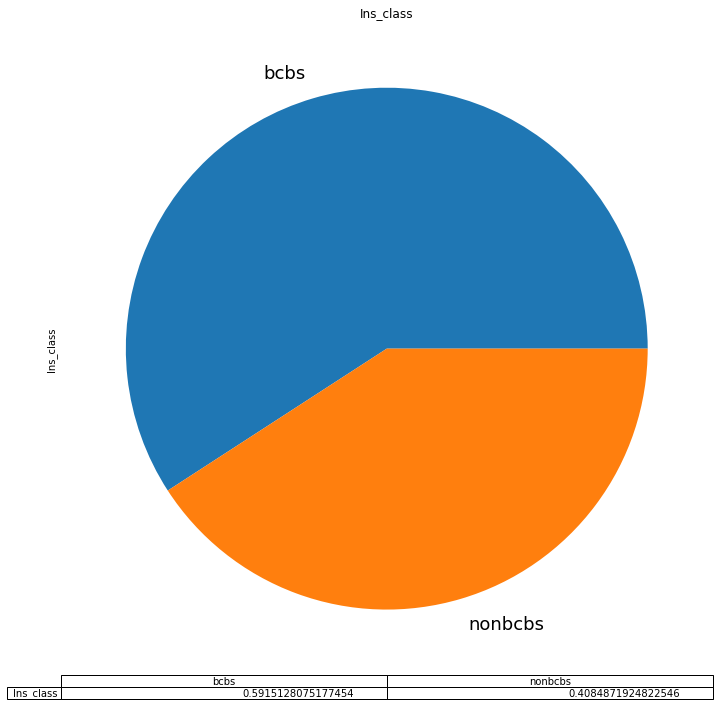

In [54]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
y=org_df_2['Ins_class'].value_counts()/org_df_2['Ins_class'].value_counts().sum()
(y).plot(y='Percentage',kind='pie',title='Ins_class',figsize =(12,12), fontsize=18, table=True)

## CPT Description

<AxesSubplot:title={'center':'cpt_description'}>

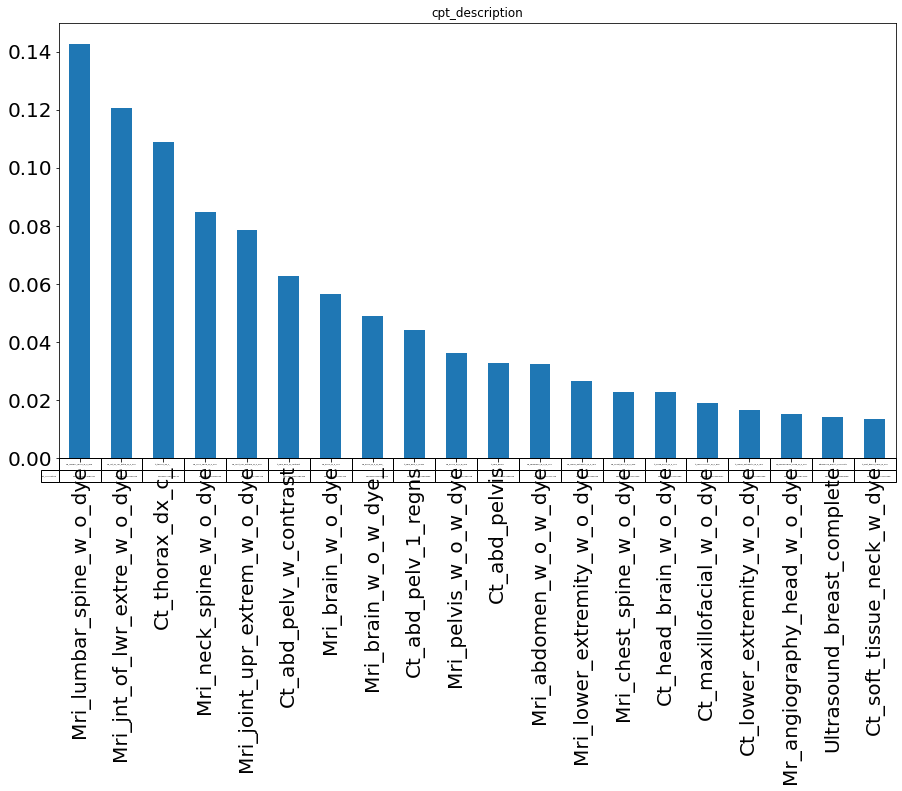

In [45]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
y=org_df_2['cpt_description'].value_counts()[0:20]/org_df_2['cpt_description'].value_counts()[0:20].sum()
(y).plot(y='Percentage',kind='bar',title='cpt_description',figsize =(15,8), fontsize=20, table=True)

## Prefix 

<AxesSubplot:title={'center':'prefix'}>

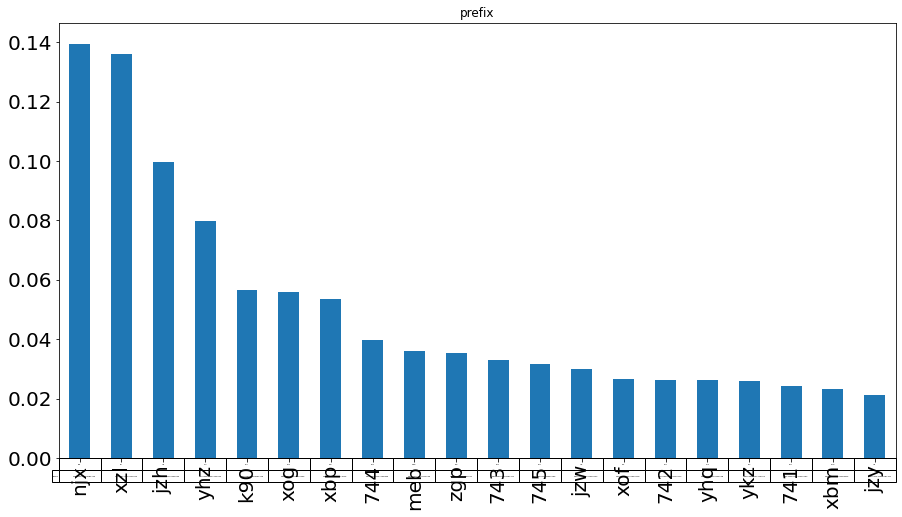

In [44]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
y=org_df_2['prefix'].value_counts()[0:20]/org_df_2['prefix'].value_counts()[0:20].sum()
(y).plot(y='Percentage',kind='bar',title='prefix',figsize =(15,8), fontsize=20, table=True)

## Class 

<AxesSubplot:title={'center':'class'}, ylabel='target'>

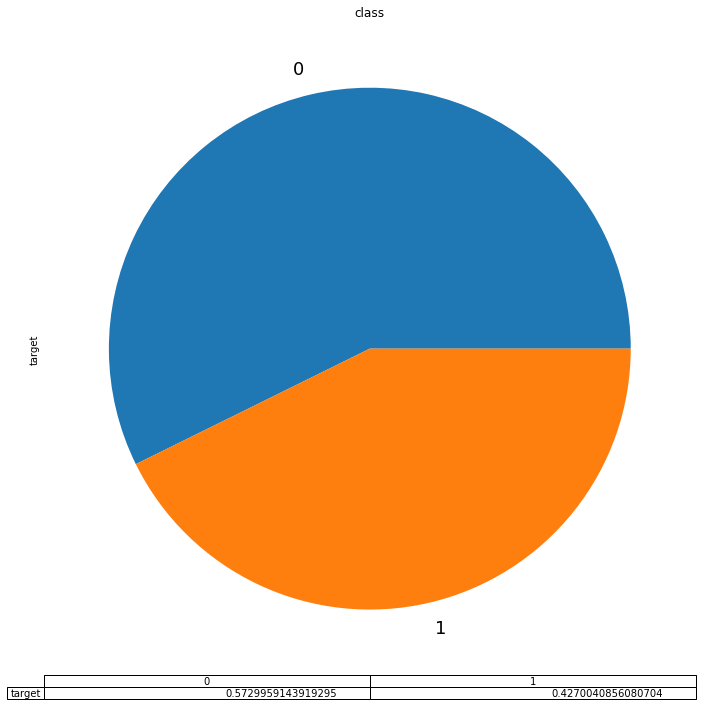

In [57]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
y=org_df_2['target'].value_counts()/org_df_2['target'].value_counts().sum()
(y).plot(kind='pie',title='class',figsize =(12,12), fontsize=18, table=True)

# Split train test 


In [10]:
x = org_df_2[['pat_age',
             'icd_description', 
             'Ins_class', 
             'clean_mod', 
             'actual_ins',   
             'cpt_description',
             'insurance_type',
             'gender']]
y = org_df_2['target'].values


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.2, stratify= y)
x_train, x_cv, y_train, y_cv= train_test_split(x_train,y_train, test_size = 0.2, stratify= y_train)

print('x_train',x_train.shape)
print('x_test',x_test.shape)

print('y_train',y_train.shape)
print('y_test',y_test.shape)

print('x_cv',x_cv.shape)
print('y_cv',y_cv.shape)

x_train (226041, 8)
x_test (70639, 8)
y_train (226041,)
y_test (70639,)
x_cv (56511, 8)
y_cv (56511,)


In [11]:
org_df_2.isnull().sum()

target                 0
clean_mod              0
gender                 0
insurance_type         0
prefix                 8
actual_ins             0
Ins_class              0
cpt_description        0
icd_description    40660
pat_age                0
dtype: int64

# Missing Values(Imputation)

In [12]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OrdinalEncoder()


impute_reshape = np.array(x_train['actual_ins'].dropna())
x_train['actual_ins'].loc[x_train['actual_ins'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.reshape(-1,1)))
train_actual_ins_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_train['icd_description'].dropna()
x_train['icd_description'].loc[x_train['icd_description'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
train_icd_description_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_train['Ins_class'].dropna()
x_train['Ins_class'].loc[x_train['Ins_class'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
train_Ins_class_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_train['clean_mod'].dropna()
x_train['clean_mod'].loc[x_train['clean_mod'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
train_clean_mod_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_train['cpt_description'].dropna()
x_train['cpt_description'].loc[x_train['cpt_description'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.astype(str).values.reshape(-1,1)))
train_cpt_code_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_train['insurance_type'].dropna()
x_train['insurance_type'].loc[x_train['insurance_type'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
train_insurance_type_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_train['gender'].dropna()
x_train['gender'].loc[x_train['gender'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
train_gender_encode = encoder 
imputer = IterativeImputer(KNeighborsRegressor())
x_train_encode_data = pd.DataFrame(np.round(imputer.fit_transform(x_train)),columns = x_train.columns)

x_train['actual_ins'] = train_actual_ins_encode.inverse_transform(np.array(x_train_encode_data['actual_ins']).reshape(-1,1))
x_train['icd_description'] = train_icd_description_encode.inverse_transform(np.array(x_train_encode_data['icd_description']).reshape(-1,1))
x_train['Ins_class'] = train_Ins_class_encode.inverse_transform(np.array(x_train_encode_data['Ins_class']).reshape(-1,1))
x_train['clean_mod'] = train_clean_mod_encode.inverse_transform(np.array(x_train_encode_data['clean_mod']).reshape(-1,1))
x_train['cpt_description'] = train_cpt_code_encode.inverse_transform(np.array(x_train_encode_data['cpt_description']).reshape(-1,1))
x_train['insurance_type'] = train_insurance_type_encode.inverse_transform(np.array(x_train_encode_data['insurance_type']).reshape(-1,1))
x_train['gender'] = train_gender_encode.inverse_transform(np.array(x_train_encode_data['gender']).reshape(-1,1))

In [13]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

impute_reshape = x_test['actual_ins'].dropna()
x_test['actual_ins'].loc[x_test['actual_ins'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
test_actual_ins_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_test['icd_description'].dropna()
x_test['icd_description'].loc[x_test['icd_description'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
test_icd_description_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_test['Ins_class'].dropna()
x_test['Ins_class'].loc[x_test['Ins_class'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
test_Ins_class_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_test['clean_mod'].dropna()
x_test['clean_mod'].loc[x_test['clean_mod'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
test_clean_mod_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_test['cpt_description'].dropna()
x_test['cpt_description'].loc[x_test['cpt_description'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.astype(str).values.reshape(-1,1)))
test_cpt_code_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_test['insurance_type'].dropna()
x_test['insurance_type'].loc[x_test['insurance_type'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
test_insurance_type_encode = encoder 


encoder = OrdinalEncoder()
impute_reshape = x_test['gender'].dropna()
x_test['gender'].loc[x_test['gender'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
test_gender_encode = encoder 
imputer = IterativeImputer(KNeighborsRegressor())
x_test_encode_data = pd.DataFrame(np.round(imputer.fit_transform(x_test)),columns = x_test.columns)

x_test['actual_ins'] = test_actual_ins_encode.inverse_transform(np.array(x_test_encode_data['actual_ins']).reshape(-1,1))
x_test['icd_description'] = test_icd_description_encode.inverse_transform(np.array(x_test_encode_data['icd_description']).reshape(-1,1))
x_test['Ins_class'] = test_Ins_class_encode.inverse_transform(np.array(x_test_encode_data['Ins_class']).reshape(-1,1))
x_test['clean_mod'] = test_clean_mod_encode.inverse_transform(np.array(x_test_encode_data['clean_mod']).reshape(-1,1))
x_test['cpt_description'] = test_cpt_code_encode.inverse_transform(np.array(x_test_encode_data['cpt_description']).reshape(-1,1))
x_test['insurance_type'] = test_insurance_type_encode.inverse_transform(np.array(x_test_encode_data['insurance_type']).reshape(-1,1))
x_test['gender'] = test_gender_encode.inverse_transform(np.array(x_test_encode_data['gender']).reshape(-1,1))

In [14]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

impute_reshape = x_cv['actual_ins'].dropna()
x_cv['actual_ins'].loc[x_cv['actual_ins'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
x_cv_actual_ins_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_cv['icd_description'].dropna()
x_cv['icd_description'].loc[x_cv['icd_description'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
x_cv_icd_description_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_cv['Ins_class'].dropna()
x_cv['Ins_class'].loc[x_cv['Ins_class'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
x_cv_Ins_class_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_cv['clean_mod'].dropna()
x_cv['clean_mod'].loc[x_cv['clean_mod'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
x_cv_clean_mod_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_cv['cpt_description'].dropna()
x_cv['cpt_description'].loc[x_cv['cpt_description'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.astype(str).values.reshape(-1,1)))
x_cv_cpt_code_encode = encoder 

encoder = OrdinalEncoder()
impute_reshape = x_cv['insurance_type'].dropna()
x_cv['insurance_type'].loc[x_cv['insurance_type'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
x_cv_insurance_type_encode = encoder 


encoder = OrdinalEncoder()
impute_reshape = x_cv['gender'].dropna()
x_cv['gender'].loc[x_cv['gender'].notnull()] = np.squeeze(encoder.fit_transform(impute_reshape.values.reshape(-1,1)))
x_cv_gender_encode = encoder 
imputer = IterativeImputer(KNeighborsRegressor())
x_cv_encode_data = pd.DataFrame(np.round(imputer.fit_transform(x_cv)),columns = x_cv.columns)

x_cv['actual_ins'] = x_cv_actual_ins_encode.inverse_transform(np.array(x_cv_encode_data['actual_ins']).reshape(-1,1))
x_cv['icd_description'] = x_cv_icd_description_encode.inverse_transform(np.array(x_cv_encode_data['icd_description']).reshape(-1,1))
x_cv['Ins_class'] = x_cv_Ins_class_encode.inverse_transform(np.array(x_cv_encode_data['Ins_class']).reshape(-1,1))
x_cv['clean_mod'] = x_cv_clean_mod_encode.inverse_transform(np.array(x_cv_encode_data['clean_mod']).reshape(-1,1))
x_cv['cpt_description'] = x_cv_cpt_code_encode.inverse_transform(np.array(x_cv_encode_data['cpt_description']).reshape(-1,1))
x_cv['insurance_type'] = x_cv_insurance_type_encode.inverse_transform(np.array(x_cv_encode_data['insurance_type']).reshape(-1,1))
x_cv['gender'] = x_cv_gender_encode.inverse_transform(np.array(x_cv_encode_data['gender']).reshape(-1,1))

# Encoding (Vectorization) 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train['actual_ins'].values)

x_train_actual_ins = vectorizer.transform(x_train['actual_ins'].astype('category'))
x_test_actual_ins = vectorizer.transform(x_test['actual_ins'].astype('category'))
x_cv_actual_ins = vectorizer.transform(x_cv['actual_ins'].astype('category'))


print('x_train_actual_ins',x_train_actual_ins.shape)
print('x_test_actual_ins',x_test_actual_ins.shape )
print('x_cv_actual_ins',x_cv_actual_ins.shape )


vectorizer.fit(x_train['insurance_type'].values)
x_train_insurance_type = vectorizer.transform(x_train['insurance_type'].values)
x_test_insurance_type = vectorizer.transform(x_test['insurance_type'].values)
x_cv_insurance_type = vectorizer.transform(x_cv['insurance_type'].values)

print('x_train_insurance_type',x_train_insurance_type.shape)
print('x_test_insurance_type',x_test_insurance_type.shape )
print('x_cv_insurance_type',x_cv_insurance_type.shape )


vectorizer = CountVectorizer()
vectorizer.fit(x_train['icd_description'].values)

x_train['icd_description'] = x_train['icd_description'].astype('category')
x_test['icd_description'] = x_test['icd_description'].astype('category')
x_cv['icd_description'] = x_cv['icd_description'].astype('category')


x_train_icd_description = vectorizer.transform(x_train['icd_description'].values)
x_test_icd_description = vectorizer.transform(x_test['icd_description'].values)
x_cv_icd_description = vectorizer.transform(x_cv['icd_description'].values)


print('x_train_icd_description',x_train_icd_description.shape)
print('x_test_icd_description',x_test_icd_description.shape )
print('x_cv_icd_description',x_cv_icd_description.shape )




vectorizer = CountVectorizer()
vectorizer.fit(x_train['cpt_description'].values)

x_train['cpt_description'] = x_train['cpt_description'].astype('category')
x_test['cpt_description'] = x_test['cpt_description'].astype('category')
x_cv['cpt_description'] = x_cv['cpt_description'].astype('category')



x_train_cpt_description = vectorizer.transform(x_train['cpt_description'].values)
x_test_cpt_description = vectorizer.transform(x_test['cpt_description'].values)
x_cv_cpt_description = vectorizer.transform(x_cv['cpt_description'].values)


print('x_train_cpt_description',x_train_cpt_description.shape)
print('x_train_cpt_description',x_train_cpt_description.shape)
print('x_cv_cpt_description',x_cv_cpt_description.shape )


vectorizer = CountVectorizer()
vectorizer.fit(x_train['Ins_class'].values)

x_train['Ins_class'] = x_train['Ins_class'].astype('category')
x_test['Ins_class'] = x_test['Ins_class'].astype('category')
x_cv['Ins_class'] = x_cv['Ins_class'].astype('category')



x_train_Ins_class = vectorizer.transform(x_train['Ins_class'].values)
x_test_Ins_class = vectorizer.transform(x_test['Ins_class'].values)
x_cv_Ins_class = vectorizer.transform(x_cv['Ins_class'].values)



print('x_train_Ins_class',x_train_Ins_class.shape)
print('x_test_Ins_class',x_test_Ins_class.shape)
print('x_cv_Ins_class',x_cv_Ins_class.shape )


vectorizer = CountVectorizer()
vectorizer.fit(x_train['gender'].values)
x_train['gender'] = x_train['gender'].astype('category')
x_test['gender'] = x_test['gender'].astype('category')
x_cv['gender'] = x_cv['gender'].astype('category')



x_train_gender = vectorizer.transform(x_train['gender'].values)
x_test_gender = vectorizer.transform(x_test['gender'].values)
x_cv_gender = vectorizer.transform(x_cv['gender'].values)
print('x_train_gender',x_train_gender.shape)
print('x_test_gender',x_test_gender.shape )
print('x_cv_gender',x_cv_gender.shape )





vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_mod'].values)
x_train['clean_mod'] = x_train['clean_mod'].astype('category')
x_test['clean_mod'] = x_test['clean_mod'].astype('category')
x_cv['clean_mod'] = x_cv['clean_mod'].astype('category')



x_train_clean_mod = vectorizer.transform(x_train['clean_mod'].values)
x_test_clean_mod = vectorizer.transform(x_test['clean_mod'].values)
x_cv_clean_mod = vectorizer.transform(x_cv['clean_mod'].values)

print('x_train_clean_mod',x_train_clean_mod.shape)
print('x_test_clean_mod',x_test_clean_mod.shape )
print('x_cv_clean_mod',x_cv_clean_mod.shape )



from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalizer = Normalizer()

scaler.fit(x_train['pat_age'].values.reshape(-1,1))

x_train_pat_age = scaler.transform(x_train['pat_age'].values.reshape(-1,1))
x_test_pat_age = scaler.transform(x_test['pat_age'].values.reshape(-1, 1))
x_cv_pat_age = scaler.transform(x_cv['pat_age'].values.reshape(-1, 1))



print('x_train_pat_age',x_train_pat_age.shape)
print('x_test_pat_age',x_test_pat_age.shape)
print('x_cv_pat_age',x_cv_pat_age.shape)



from scipy.sparse import hstack
x_train_hstack = hstack((x_train_gender,
                         x_train_insurance_type,
                         x_train_actual_ins,
                         x_train_cpt_description,
                         x_train_icd_description,
                         x_train_Ins_class,
                         x_train_pat_age,
                         x_train_clean_mod
                         )).tocsr()

x_test_hstack = hstack((x_test_gender,
                        x_test_insurance_type,
                        x_test_actual_ins,
                        x_test_cpt_description,
                        x_test_icd_description,
                        x_test_Ins_class,
                        x_test_pat_age,
                        x_test_clean_mod,
                        )).tocsr()


x_cv_hstack = hstack((x_cv_gender,
                        x_cv_insurance_type,
                        x_cv_actual_ins,
                        x_cv_cpt_description,
                        x_cv_icd_description,
                        x_cv_Ins_class,
                        x_cv_pat_age,
                        x_cv_clean_mod,
                        )).tocsr()


print(x_train_hstack.shape)
print(x_test_hstack.shape)
print(x_cv_hstack.shape)

x_train_actual_ins (226041, 86)
x_test_actual_ins (70639, 86)
x_cv_actual_ins (56511, 86)
x_train_insurance_type (226041, 3)
x_test_insurance_type (70639, 3)
x_cv_insurance_type (56511, 3)
x_train_icd_description (226041, 21)
x_test_icd_description (70639, 21)
x_cv_icd_description (56511, 21)
x_train_cpt_description (226041, 203)
x_train_cpt_description (226041, 203)
x_cv_cpt_description (56511, 203)
x_train_Ins_class (226041, 2)
x_test_Ins_class (70639, 2)
x_cv_Ins_class (56511, 2)
x_train_gender (226041, 4)
x_test_gender (70639, 4)
x_cv_gender (56511, 4)
x_train_clean_mod (226041, 4)
x_test_clean_mod (70639, 4)
x_cv_clean_mod (56511, 4)
x_train_pat_age (226041, 1)
x_test_pat_age (70639, 1)
x_cv_pat_age (56511, 1)
(226041, 324)
(70639, 324)
(56511, 324)


## Colinearity bw Live sample and test sample

In [24]:
from scipy.stats.stats import pearsonr   
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [25]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 =  chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [26]:
cramers_v(x_train['pat_age'], x_train['pat_age'])

1.0000000000000053

In [27]:
x_train_encode_data.columns

Index(['pat_age', 'icd_description', 'Ins_class', 'clean_mod', 'actual_ins',
       'cpt_description', 'insurance_type', 'gender'],
      dtype='object')

In [28]:
cramers_v(x_train_encode_data['pat_age'], xsample_encode_data['pat_age'])

0.9999999999999972

In [29]:
cramers_v(x_train_encode_data['Ins_class'], xsample_encode_data['Ins_class'])

0.999315322467181

In [30]:
cramers_v(x_train_encode_data['clean_mod'], xsample_encode_data['clean_mod'])

1.0

In [31]:
cramers_v(x_train_encode_data['insurance_type'], xsample_encode_data['insurance_type'])

0.9924714927947306

In [32]:
cramers_v(x_train['actual_ins'], xsample['actual_ins'])

1.0

In [33]:
cramers_v(x_train_encode_data['gender'], xsample_encode_data['gender'])

1.0

In [34]:
cramers_v(x_train['cpt_description'], xsample['cpt_description'])

1.0

In [35]:
CrosstabResult=pd.crosstab(index=x_train['cpt_description'],columns=xsample['cpt_description'])
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


In [36]:
cpt_frequency = x_train['cpt_description'].value_counts().rename_axis('cpt_description').reset_index(name='counts')

In [37]:
cpt_frequency

cpt_description  counts
0        Mri_lumbar_spine_w_o_dye   23796
1    Mri_jnt_of_lwr_extre_w_o_dye   20335
2                 Ct_thorax_dx_c_   18298
3          Mri_neck_spine_w_o_dye   14344
4    Mri_joint_upr_extrem_w_o_dye   13235
..                            ...     ...
199      Ct_hrt_w_3d_image_congen       1
200    Rp_loclzj_tum_spect_w_ct_1       1
201        Radiographic_procedure       1
202  Parathyrd_planar_w_wo_subtrj       1
203            Thyroid_met_uptake       1

[204 rows x 2 columns]

In [38]:
org_df_2 = org_df_2.merge(cpt_frequency,how='left', on='cpt_description')  

In [39]:
cpt_frequency = x_train['cpt_description'].value_counts().rename_axis('cpt_description').reset_index(name='counts')
cpt_frequency['cpt_prec'] = cpt_frequency['counts'].cumsum()/cpt_frequency['counts'].sum()
org_df_2 = org_df_2.merge(cpt_frequency,how='left', on='cpt_description')  

# Spot-Check Algorithms

In [20]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [23]:
from catboost import CatBoostClassifier
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, x_train_hstack, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.638782 (0.003945)
CART: 0.947921 (0.002121)


In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, x_train_hstack, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Confusion Matrix function

In [39]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

# Baseline model

In [13]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
train_data_len = x_train.shape[0]
test_data_len = x_test.shape[0]
cv_data_len = x_cv.shape[0]

# we create a output array that has exactly same size as the CV data
train_predicted_y = np.zeros((train_data_len,2))
for i in range(train_data_len):
    rand_probs = np.random.rand(1,2)
    train_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on TRAIN Data using Random Model",log_loss(y_train,train_predicted_y, eps=1e-15))


# we create a output array that has exactly same size as the CV data
test_predicted_y = np.zeros((test_data_len,2))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,2)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on TEST Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))



# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,2))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,2)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on CV Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# predicted_y =np.argmax(test_predicted_y, axis=1)
# plot_confusion_matrix(y_test, predicted_y)
# confusion_matrix(y_test, predicted_y)

Log loss on TRAIN Data using Random Model 0.8821786763289038
Log loss on TEST Data using Random Model 0.8821729206459882
Log loss on CV Validation Data using Random Model 0.8874464112003753


## Baseline model-confusion matrix

Number of misclassified points  50.0021234728691
-------------------------------------------------- Confusion matrix --------------------------------------------------


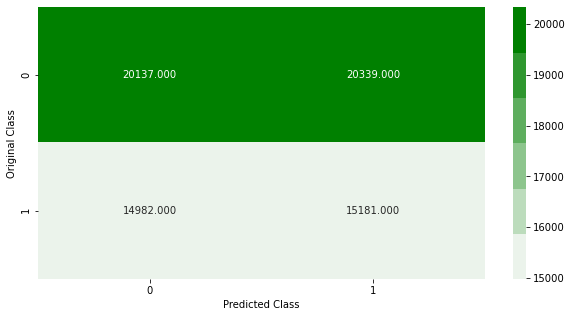

-------------------------------------------------- Precision matrix --------------------------------------------------


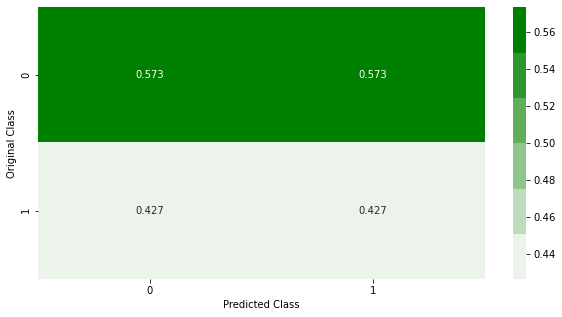

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


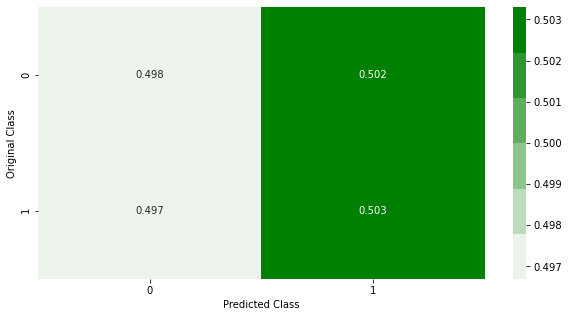

Sum of rows in precision matrix [1. 1.]


array([[20137, 20339],
       [14982, 15181]], dtype=int64)

In [14]:
predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)
confusion_matrix(y_test, predicted_y)

## Baseline model-Classification

In [15]:
from sklearn.metrics import classification_report 

print("-"*20,"Train Data","-"*30)
print(classification_report(y_train,np.argmax(train_predicted_y, axis=1)))
print("-"*20,"Test Data","-"*20)
print(classification_report(y_test,np.argmax(test_predicted_y, axis=1)))
print("-"*20,"CV Data","-"*20)
print(classification_report(y_cv,np.argmax(cv_predicted_y, axis=1)))


-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.57      0.50      0.54    129520
           1       0.43      0.50      0.46     96521

    accuracy                           0.50    226041
   macro avg       0.50      0.50      0.50    226041
weighted avg       0.51      0.50      0.50    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.57      0.50      0.53     40476
           1       0.43      0.50      0.46     30163

    accuracy                           0.50     70639
   macro avg       0.50      0.50      0.50     70639
weighted avg       0.51      0.50      0.50     70639

-------------------- CV Data --------------------
              precision    recall  f1-score   support

           0       0.57      0.50      0.53     32381
           1       0.42      0.50      0.46     24130

    accuracy     

## Baseline model - Observation 

<p> Based on the classification report the data shows no prediction prower over random

# Naive Bayes classifier

for alpha = 1e-05
Log Loss : 0.6400102399048858
for alpha = 0.0001
Log Loss : 0.6400102652664049
for alpha = 0.001
Log Loss : 0.6400105188774157
for alpha = 0.1
Log Loss : 0.640038250445296
for alpha = 1
Log Loss : 0.6402501151171709
for alpha = 10
Log Loss : 0.6411730591021073
for alpha = 100
Log Loss : 0.6445416768997964
for alpha = 1000
Log Loss : 0.652815332853572


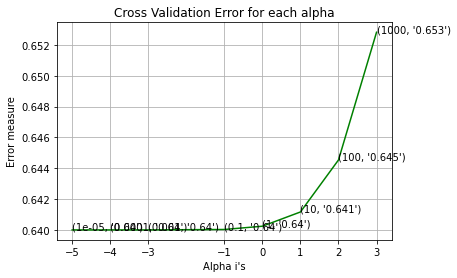

For values of best alpha =  1e-05 The train log loss is: 0.6380772577586917
For values of best alpha =  1e-05 The cross validation log loss is: 0.6400102399048858
For values of best alpha =  1e-05 The test log loss is: 0.6405257507239264


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(x_train_hstack, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_hstack, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_cv_hstack)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
model = MultinomialNB(alpha=alpha[best_alpha])
model.fit(x_train_hstack, y_train)
sig_clf = CalibratedClassifierCV(model, method="sigmoid")
sig_clf.fit(x_train_hstack, y_train)


predict_y = sig_clf.predict_proba(x_train_hstack)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_hstack)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_hstack)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


## Navie Bayes - Hyperparameter tuning

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

def objective(trial):

    alpha = trial.suggest_int("alpha", 0.00001,1000)
    
    rf =  MultinomialNB(alpha=alpha)
    score = cross_val_score(rf, x_train_hstack, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

## Navie Bayes-AUC Curve

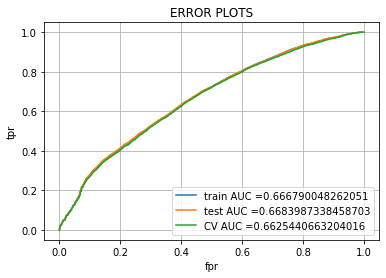

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
model = MultinomialNB(alpha = 0.00001)

sig_clf = CalibratedClassifierCV(model, method="sigmoid")
sig_clf.fit(x_train_hstack, y_train)

y_train_pred = sig_clf.predict_proba(x_train_hstack)    
y_test_pred = sig_clf.predict_proba(x_test_hstack)
y_cv_pred = sig_clf.predict_proba(x_cv_hstack)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )



plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## NavieBayes - logloss & Classification Report

In [27]:
predict_y = sig_clf.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, labels=sig_clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y,labels=sig_clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,labels=sig_clf.classes_, eps=1e-15))

from sklearn.metrics import classification_report

print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( classification_report(y_train, sig_clf.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( classification_report(y_test, sig_clf.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( classification_report(y_cv, sig_clf.predict(x_cv_hstack)))


train log loss: 0.6383469206785597
test log loss: 0.637058961043402
cv log loss: 0.640462550624777
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.64      0.83      0.72    129520
           1       0.63      0.37      0.47     96521

    accuracy                           0.64    226041
   macro avg       0.63      0.60      0.60    226041
weighted avg       0.63      0.64      0.62    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.64      0.84      0.73     40476
           1       0.63      0.38      0.47     30163

## Navie Bayes - Observation

<p> As per the classification report the f1 score for the class 1 is very low and as well as macro avg is also very less, hence This Model is not optimal for deployment <p>

# K-Neighbors Classifier

## K-nn hyperparameter tunning 

In [ ]:

alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_hstack, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_hstack, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_cv_hstack)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(x_train_hstack, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_hstack, y_train)

predict_y = sig_clf.predict_proba(x_train_hstack)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_hstack)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_hstack)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


## K-nn log loss and classification report

# LogisticRegression

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , balanced_accuracy_score
import matplotlib.pyplot as plt

## LogisticReg - Hyperparameter tunning

In [34]:
ml =  LogisticRegression()
parameters = {"C": [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
              "penalty":["l2","l1"],
              'solver':['saga']}
CV = GridSearchCV(ml, parameters, 
                  return_train_score=True, 
                  cv=10,
                  scoring='neg_log_loss',
                  error_score='raise',
                  n_jobs=-1,
                  verbose=5)
CV.fit(x_train_hstack, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.2min finished


GridSearchCV(cv=10, error_score='raise',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l2', 'l1'], 'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_log_loss', verbose=5)

## Hyper-parameter V/s AUC 

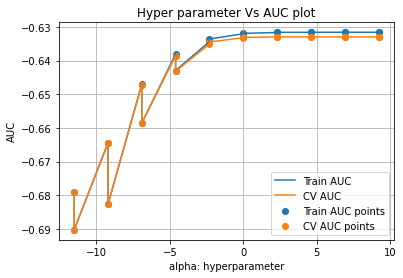

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       3.142686      0.328788         0.010345        0.002840   1e-05   
1       0.334197      0.149936         0.008985        0.000622   1e-05   

  param_penalty param_solver                                           params  \
0            l2         saga  {'C': 1e-05, 'penalty': 'l2', 'solver': 'saga'}   
1            l1         saga  {'C': 1e-05, 'penalty': 'l1', 'solver': 'saga'}   

   split0_test_score  split1_test_score  ...  split2_train_score  \
0          -0.679070          -0.679057  ...           -0.679083   
1          -0.697973          -0.687709  ...           -0.685916   

   split3_train_score  split4_train_score  split5_train_score  \
0           -0.679040           -0.679075           -0.679050   
1           -0.682721           -0.708318           -0.699386   

   split6_train_score  split7_train_score  split8_train_score  \
0           -0.679073           -0.679081           -0.679085   
1           -0.689015           -0.682821           -0.682750   

   split9_train_score  mean_train_score  std_train_score  
0           -0.679062         -0.679069         0.000014  
1           -0.686522         -0.690315         0.008237  

[2 rows x 33 columns]

In [35]:
results = pd.DataFrame.from_dict(CV.cv_results_)
import math
logvalues = []
for i in range(0,results['param_C'].shape[0]):
    logvalues.append(math.log(results['param_C'][i]))
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_C']

plt.plot(logvalues, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logvalues, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logvalues, train_auc, label='Train AUC points')
plt.scatter(logvalues, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head(2)

In [ ]:
import math
logvalues = []
for i in range(0,results['param_C'].shape[0]):
    logvalues.append(math.log(results['param_C'][i]))

In [36]:
CV.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

## LogisticRegression - AUC Curve

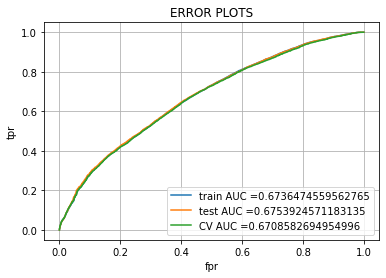

In [29]:
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C=10,penalty='l1',solver='saga')
model.fit(x_train_hstack, y_train)

y_train_pred = model.predict_proba(x_train_hstack)    
y_test_pred = model.predict_proba(x_test_hstack)
y_cv_pred = model.predict_proba(x_cv_hstack)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## LogisticRegression - LogLoss & Classification report

In [30]:
predict_y = model.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y,labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,labels=model.classes_, eps=1e-15))


print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, model.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, model.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, model.predict(x_cv_hstack)))


train log loss: 0.6320214024003328
test log loss: 0.6310909009942756
cv log loss: 0.6340307471798363
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.64      0.84      0.73    129520
           1       0.63      0.38      0.47     96521

    accuracy                           0.64    226041
   macro avg       0.64      0.61      0.60    226041
weighted avg       0.64      0.64      0.62    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.64      0.84      0.73     40476
           1       0.63      0.38      0.48     301

## LogisticRegression - Balanced Accuracy

In [32]:
print(balanced_accuracy_score(y_train, model.predict(x_train_hstack)))
print(balanced_accuracy_score(y_test, model.predict(x_test_hstack)))
print(balanced_accuracy_score(y_cv, model.predict(x_cv_hstack)))


0.6069632572797495
0.6089320737862541
0.6062229468650382


## LogisticRegression - Observation

* Class 1 has very low f1 scores.
* Logloss is similar across Train, Test and CV however we require higher accuracy specifically for the Class 1. 

# SVM

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [57]:
import optuna

import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def objective(trial):
    
    

    penalty = trial.suggest_categorical("penalty", ["l2", "l1","elasticnet"])
    alpha = trial.suggest_uniform("alpha",0.0, 1.0)
    
    #class_weight = trial.suggest_categorical("class_weight", ["weight", "balanced"])
    #eta0= trial.suggest_int("eta0", 0.00001, 10000)
    rf = SGDClassifier(penalty =penalty,
                       alpha=alpha, 
                       
                       
                       
                       
        )

    score = cross_val_score(rf, x_train_hstack, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2021-08-23 21:32:25,234] A new study created in memory with name: no-name-2b74e45d-1854-4a77-88fb-ae9702b1853c
[I 2021-08-23 21:32:25,864] Trial 0 finished with value: 0.5740108504450258 and parameters: {'penalty': 'l2', 'alpha': 0.06705476449038916}. Best is trial 0 with value: 0.5740108504450258.
[I 2021-08-23 21:32:26,305] Trial 1 finished with value: 0.5721591895247159 and parameters: {'penalty': 'l2', 'alpha': 0.5588937830229677}. Best is trial 0 with value: 0.5740108504450258.
[I 2021-08-23 21:32:26,785] Trial 2 finished with value: 0.5721591895247159 and parameters: {'penalty': 'elasticnet', 'alpha': 0.9413576705830834}. Best is trial 0 with value: 0.5740108504450258.
[I 2021-08-23 21:32:27,249] Trial 3 finished with value: 0.5721591895247159 and parameters: {'penalty': 'l2', 'alpha': 0.40309294412705765}. Best is trial 0 with value: 0.5740108504450258.
[I 2021-08-23 21:32:27,734] Trial 4 finished with value: 0.5721591895247159 and parameters: {'penalty': 'l1', 'alpha': 0.721

[I 2021-08-23 21:32:47,607] Trial 40 finished with value: 0.5974859686409 and parameters: {'penalty': 'l2', 'alpha': 0.058447378052496855}. Best is trial 32 with value: 0.6304242343654769.
[I 2021-08-23 21:32:48,123] Trial 41 finished with value: 0.6260621469547846 and parameters: {'penalty': 'l2', 'alpha': 0.0034524981223962485}. Best is trial 32 with value: 0.6304242343654769.
[I 2021-08-23 21:32:48,580] Trial 42 finished with value: 0.6216510972414214 and parameters: {'penalty': 'l2', 'alpha': 0.005966631393087617}. Best is trial 32 with value: 0.6304242343654769.
[I 2021-08-23 21:32:49,028] Trial 43 finished with value: 0.5721591895247159 and parameters: {'penalty': 'l2', 'alpha': 0.09144473434580601}. Best is trial 32 with value: 0.6304242343654769.
[I 2021-08-23 21:32:49,529] Trial 44 finished with value: 0.5740242037192486 and parameters: {'penalty': 'l2', 'alpha': 0.0672038417321216}. Best is trial 32 with value: 0.6304242343654769.
[I 2021-08-23 21:32:49,981] Trial 45 finished

[I 2021-08-23 21:33:10,166] Trial 80 finished with value: 0.5721591895247159 and parameters: {'penalty': 'elasticnet', 'alpha': 0.1194510802067076}. Best is trial 67 with value: 0.6333753227686464.
[I 2021-08-23 21:33:10,665] Trial 81 finished with value: 0.6216065860301582 and parameters: {'penalty': 'l2', 'alpha': 0.028254000152887412}. Best is trial 67 with value: 0.6333753227686464.
[I 2021-08-23 21:33:11,301] Trial 82 finished with value: 0.628715011817582 and parameters: {'penalty': 'l2', 'alpha': 0.0011203889638107842}. Best is trial 67 with value: 0.6333753227686464.
[I 2021-08-23 21:33:11,969] Trial 83 finished with value: 0.6297832737554092 and parameters: {'penalty': 'l2', 'alpha': 0.0008028212906559871}. Best is trial 67 with value: 0.6333753227686464.
[I 2021-08-23 21:33:12,719] Trial 84 finished with value: 0.6005572433473806 and parameters: {'penalty': 'l2', 'alpha': 0.05766999349105357}. Best is trial 67 with value: 0.6333753227686464.
[I 2021-08-23 21:33:13,236] Trial 

In [58]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.6333753227686464
Best hyperparameters: {'penalty': 'elasticnet', 'alpha': 3.506401540464611e-05}


In [59]:
optuna.visualization.plot_optimization_history(study)

In [63]:
import optuna
from sklearn.linear_model import SGDClassifier

def objective(trial):
    alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
    clf = SGDClassifier(alpha=alpha)
    n_train_iter = 100

    for step in range(n_train_iter):
        clf.fit( x_train_hstack, y_train)

        intermediate_value = clf.score(x_test_hstack, y_test)
        trial.report(intermediate_value, step)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return clf.score(x_test_hstack, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2021-08-23 21:37:38,650] A new study created in memory with name: no-name-68cbe8ec-9ab9-4b1f-bd8e-14dc5eb6b373
[I 2021-08-23 21:38:12,128] Trial 0 finished with value: 0.6201145168641751 and parameters: {'alpha': 0.04600271502645903}. Best is trial 0 with value: 0.6201145168641751.
[I 2021-08-23 21:38:43,057] Trial 1 finished with value: 0.5721570191431176 and parameters: {'alpha': 0.5615089380162953}. Best is trial 0 with value: 0.6201145168641751.
[I 2021-08-23 21:39:11,274] Trial 2 finished with value: 0.5721570191431176 and parameters: {'alpha': 0.6899840221099076}. Best is trial 0 with value: 0.6201145168641751.
[I 2021-08-23 21:39:38,329] Trial 3 finished with value: 0.5721570191431176 and parameters: {'alpha': 0.20685540594336072}. Best is trial 0 with value: 0.6201145168641751.
[I 2021-08-23 21:40:09,245] Trial 4 finished with value: 0.5722424794895169 and parameters: {'alpha': 0.08107257725235595}. Best is trial 0 with value: 0.6201145168641751.
[I 2021-08-23 21:40:36,690] 

In [64]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.6250569735642661
Best hyperparameters: {'alpha': 0.004047645920689243}


## SVM hyperparameter tunning 

## SVM -  Hyperparameter V/s AUC Score

In [ ]:
results = pd.DataFrame.from_dict(CV.cv_results_)
import math
logvalues = []
for i in range(0,results['param_alpha'].shape[0]):
    logvalues.append(math.log(results['param_alpha'][i]))
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(logvalues, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logvalues, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logvalues, train_auc, label='Train AUC points')
plt.scatter(logvalues, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head(2)

In [ ]:
CV.best_params_

## SVM - AUC Curve

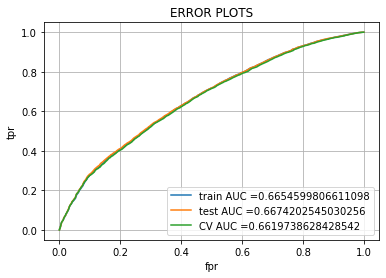

In [34]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, auc
model = SGDClassifier(alpha= 3.506401540464611e-05, penalty='elasticnet', random_state=42)

calibrator = CalibratedClassifierCV(model)

model = calibrator.fit(x_train_hstack, y_train)

y_train_pred = model.predict_proba(x_train_hstack)    
y_test_pred = model.predict_proba(x_test_hstack)
y_cv_pred = model.predict_proba(x_cv_hstack)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )



plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## SVM -  LogLoss & Classification report

In [36]:

predict_y = model.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y,labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,labels=model.classes_, eps=1e-15))



print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, model.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, model.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, model.predict(x_cv_hstack)))

train log loss: 0.6512546852080082
test log loss: 0.649276880127748
cv log loss: 0.6522152183730464
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.63      0.87      0.73    129520
           1       0.64      0.32      0.43     96521

    accuracy                           0.63    226041
   macro avg       0.64      0.59      0.58    226041
weighted avg       0.64      0.63      0.60    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     40476
           1       0.65      0.33      0.43     3016

## SVM Observation

* Class f1 score is very low
* Recall for Class 1 is very low

# DecisionTreeClassifier

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


## Decision Tree - Hyperparameter tunning

In [69]:
parameters = {"min_samples_split":[5, 10, 100, 500,1000],
              "criterion" : ['gini'] ,
             'max_depth':[1, 5, 10, 50]}
#best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500]

In [70]:
ml = DecisionTreeClassifier(random_state=0)
CV = GridSearchCV(ml, parameters, 
                  return_train_score=True, 
                  cv=10, 
                  scoring='neg_log_loss',
                  error_score='raise',
                  n_jobs=-1,
                  verbose=5)
CV.fit(x_train_hstack, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.9min finished


GridSearchCV(cv=10, error_score='raise',
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [

## Decision Tree - hyperparamenter Vs AUC

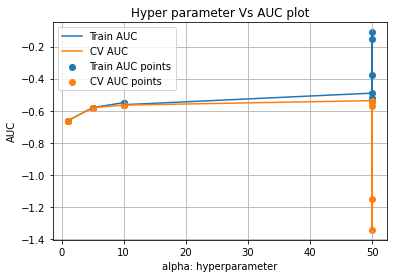

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.281249      0.023513         0.013065        0.001133   
1       0.293574      0.043620         0.013065        0.003136   

  param_criterion param_max_depth param_min_samples_split  \
0            gini               1                       5   
1            gini               1                      10   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 1, 'min_sam...          -0.662113   
1  {'criterion': 'gini', 'max_depth': 1, 'min_sam...          -0.662113   

   split1_test_score  ...  split2_train_score  split3_train_score  \
0          -0.662111  ...           -0.662743           -0.662353   
1          -0.662111  ...           -0.662743           -0.662353   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.662486           -0.662589           -0.662651   
1           -0.662486           -0.662589           -0.662651   

   split7_train_score  split8_train_score  split9_train_score  \
0            -0.66252           -0.662726           -0.662557   
1            -0.66252           -0.662726           -0.662557   

   mean_train_score  std_train_score  
0         -0.662591         0.000112  
1         -0.662591         0.000112  

[2 rows x 33 columns]

In [71]:
results = pd.DataFrame.from_dict(CV.cv_results_)
import math
logvalues = []
for i in range(0,results['param_max_depth'].shape[0]):
    logvalues.append(math.log(results['param_max_depth'][i]))

results = pd.DataFrame.from_dict(CV.cv_results_)
results = results.sort_values(['param_max_depth'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_max_depth']

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head(2)

In [21]:
import optuna
from sklearn.model_selection import cross_val_score


def objective(trial):
    
    

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 612)
    max_depth = trial.suggest_int("max_depth", 2, 612)
    max_leaf_nodes = int(trial.suggest_int("max_leaf_nodes", 2, 612))
    
    

    rf = DecisionTreeClassifier(criterion =criterion,
                                max_depth=max_depth, 
                                min_samples_split=min_samples_split,
                                max_leaf_nodes=max_leaf_nodes,
                               
                                
        )

    score = cross_val_score(rf, x_train_hstack, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2021-09-02 01:55:41,542] A new study created in memory with name: no-name-52864004-983f-42e6-8439-17a2c8957006
[I 2021-09-02 01:55:45,659] Trial 0 finished with value: 0.5516421214007501 and parameters: {'criterion': 'gini', 'min_samples_split': 264, 'max_depth': 201, 'max_leaf_nodes': 85}. Best is trial 0 with value: 0.5516421214007501.
[I 2021-09-02 01:55:49,613] Trial 1 finished with value: 0.5795619591596398 and parameters: {'criterion': 'gini', 'min_samples_split': 324, 'max_depth': 147, 'max_leaf_nodes': 441}. Best is trial 1 with value: 0.5795619591596398.
[I 2021-09-02 01:55:55,806] Trial 2 finished with value: 0.5786186668898659 and parameters: {'criterion': 'entropy', 'min_samples_split': 517, 'max_depth': 507, 'max_leaf_nodes': 241}. Best is trial 1 with value: 0.5795619591596398.
[I 2021-09-02 01:56:02,219] Trial 3 finished with value: 0.5804547853868689 and parameters: {'criterion': 'gini', 'min_samples_split': 392, 'max_depth': 486, 'max_leaf_nodes': 345}. Best is tria

[I 2021-09-02 01:59:24,727] Trial 33 finished with value: 0.5817309867523349 and parameters: {'criterion': 'entropy', 'min_samples_split': 242, 'max_depth': 172, 'max_leaf_nodes': 424}. Best is trial 7 with value: 0.5821597391936782.
[I 2021-09-02 01:59:31,925] Trial 34 finished with value: 0.5806818003689124 and parameters: {'criterion': 'entropy', 'min_samples_split': 240, 'max_depth': 171, 'max_leaf_nodes': 421}. Best is trial 7 with value: 0.5821597391936782.
[I 2021-09-02 01:59:38,102] Trial 35 finished with value: 0.5793551576160908 and parameters: {'criterion': 'entropy', 'min_samples_split': 332, 'max_depth': 245, 'max_leaf_nodes': 383}. Best is trial 7 with value: 0.5821597391936782.
[I 2021-09-02 01:59:43,167] Trial 36 finished with value: 0.580439653741614 and parameters: {'criterion': 'gini', 'min_samples_split': 396, 'max_depth': 129, 'max_leaf_nodes': 431}. Best is trial 7 with value: 0.5821597391936782.
[I 2021-09-02 01:59:48,267] Trial 37 finished with value: 0.57865905

In [22]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.5821597391936782
Best hyperparameters: {'criterion': 'gini', 'min_samples_split': 227, 'max_depth': 592, 'max_leaf_nodes': 497}


In [78]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.7099789319674527
Best hyperparameters: {'criterion': 'gini', 'min_samples_split': 22, 'max_depth': 233, 'max_leaf_nodes': 611}


In [79]:
optuna.visualization.plot_optimization_history(study)

In [80]:
optuna.visualization.plot_slice(study)

In [ ]:
Best hyperparameters: {'criterion': 'gini', 'min_samples_split': 22, 'max_depth': 233, 'max_leaf_nodes': 611}

In [74]:
CV.best_params_

{'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 500}

## DecisionTree - AUC Curve

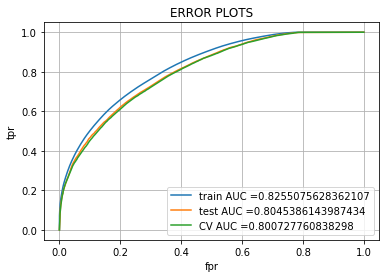

In [38]:
from sklearn.metrics import roc_curve, auc
#model = DecisionTreeClassifier(criterion='gini', max_depth= 233, min_samples_split=22,max_leaf_nodes=611)
model = DecisionTreeClassifier(criterion='gini', max_depth= 50, min_samples_split=500)
model.fit(x_train_hstack, y_train)

y_train_pred = model.predict_proba(x_train_hstack)    
y_test_pred = model.predict_proba(x_test_hstack)
y_cv_pred = model.predict_proba(x_cv_hstack)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## DecisionTree - LogLoss and Classification report

train log loss: 0.4882236457026203
test log loss: 0.5452186111449592
cv log loss: 0.5401434574428985
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.75      0.83      0.79    129520
           1       0.73      0.62      0.67     96521

    accuracy                           0.74    226041
   macro avg       0.74      0.72      0.73    226041
weighted avg       0.74      0.74      0.74    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.73      0.82      0.77     40476
           1       0.71      0.60      0.65     301

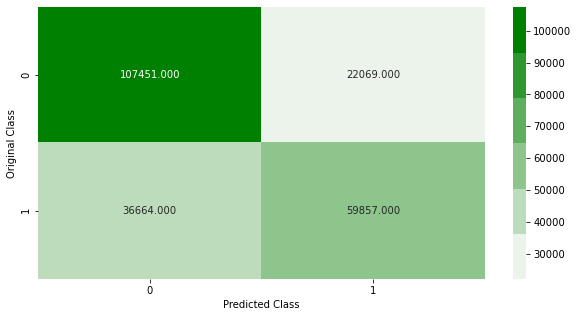

-------------------------------------------------- Precision matrix --------------------------------------------------


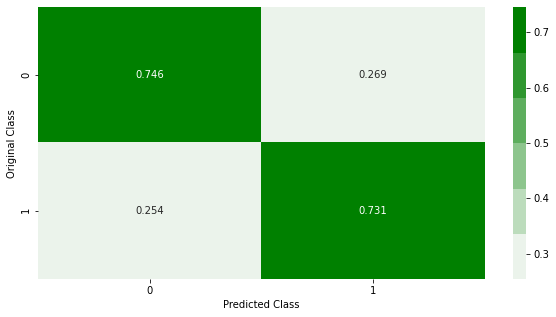

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


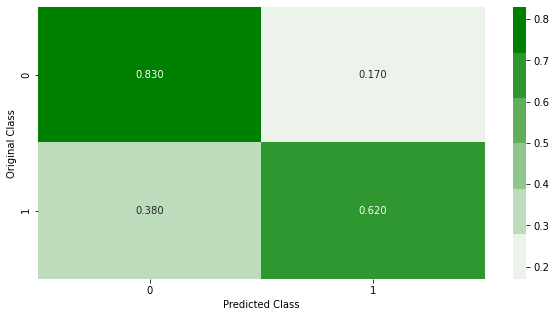

Sum of rows in precision matrix [1. 1.]
_test__test__test__test__test__test__test__test__test__test_
Number of misclassified points  27.65469499851357
-------------------------------------------------- Confusion matrix --------------------------------------------------


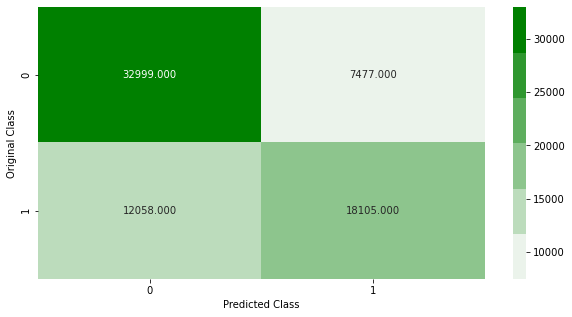

-------------------------------------------------- Precision matrix --------------------------------------------------


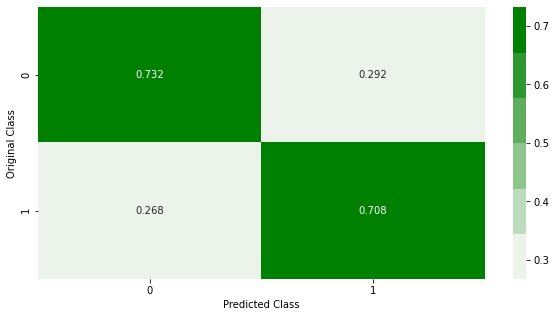

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


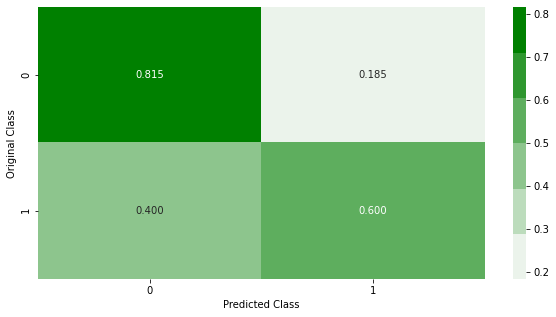

Sum of rows in precision matrix [1. 1.]
_cv__cv__cv__cv__cv__cv__cv__cv__cv__cv_
Number of misclassified points  28.077719382067208
-------------------------------------------------- Confusion matrix --------------------------------------------------


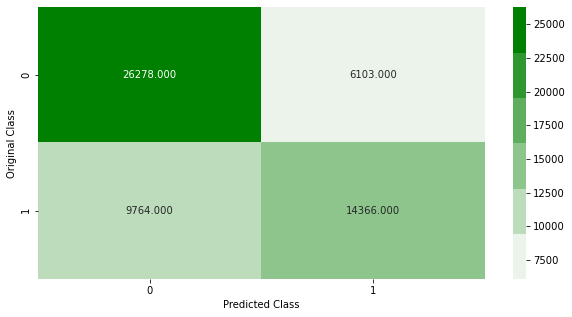

-------------------------------------------------- Precision matrix --------------------------------------------------


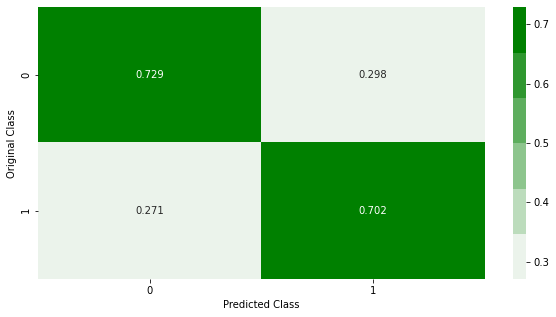

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


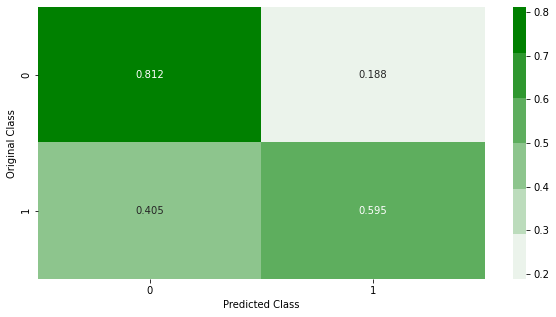

Sum of rows in precision matrix [1. 1.]


array([[26278,  6103],
       [ 9764, 14366]], dtype=int64)

In [41]:

predict_y = model.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y,labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,labels=model.classes_, eps=1e-15))



print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, model.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, model.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, model.predict(x_cv_hstack)))

print('_train_'*10)
plot_confusion_matrix(y_train, model.predict(x_train_hstack))
confusion_matrix(y_train, model.predict(x_train_hstack))


print('_test_'*10)
plot_confusion_matrix(y_test,  model.predict(x_test_hstack))
confusion_matrix(y_test,  model.predict(x_test_hstack))

print('_cv_'*10)
plot_confusion_matrix(y_cv, model.predict(x_cv_hstack))
confusion_matrix(y_cv, model.predict(x_cv_hstack))



# CatBoostClassifier

In [42]:
import numpy as np
import catboost
from catboost import CatBoostClassifier, Pool
from datetime import time
from catboost.utils import eval_metric

In [24]:
categorical_features = ['icd_description', 'Ins_class', 'clean_mod', 'actual_ins','cpt_description', 'insurance_type', 'gender']

numeric_features = ['pat_age'] 

X_train, X_test, y_train, y_test = train_test_split(x[numeric_features + categorical_features], y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train[numeric_features + categorical_features], y_train, test_size=0.1, random_state=42)

cat_train_pool = catboost.Pool(x_train, y_train, cat_features=categorical_features)
cat_val_pool = catboost.Pool(x_test, y_test, cat_features=categorical_features)
cat_test_pool = catboost.Pool(x_cv, y_cv, cat_features=categorical_features)

CatBoostError: Invalid type for cat_feature[non-default value idx=8,feature_idx=1]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [ ]:
calc_test_quality(train_pool=cat_train_pool,val_pool=cat_val_pool,test_pool=cat_test_pool)

In [85]:
import optuna
from optuna.samplers import TPESampler
from catboost.utils import eval_metric

from hyperopt import hp, fmin, tpe
import numpy as np

from scipy import stats

In [86]:
import optuna
from optuna.samplers import TPESampler
from catboost.utils import eval_metric

from hyperopt import hp, fmin, tpe
import numpy as np

from scipy import stats

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 0, 8)
    }

    model = catboost.CatBoostClassifier(**params, random_seed=42)
    model.fit(cat_train_pool, verbose=0, eval_set=cat_val_pool)
    y_pred = model.predict_proba(cat_val_pool)
    return eval_metric(cat_val_pool.get_label(), y_pred[:, 1], 'Logloss')

sampler = TPESampler(seed=123)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=50)

[I 2021-08-24 00:19:57,285] A new study created in memory with name: no-name-35ea7339-8e9f-47e3-b412-a82e1f602202
[I 2021-08-24 00:22:04,735] Trial 0 finished with value: 0.6734163078880869 and parameters: {'learning_rate': 0.07268222670380756, 'depth': 5, 'l2_leaf_reg': 3.041663082077828, 'boosting_type': 'Plain', 'max_ctr_complexity': 3}. Best is trial 0 with value: 0.6734163078880869.
[I 2021-08-24 00:27:23,902] Trial 1 finished with value: 0.6640967519891418 and parameters: {'learning_rate': 0.0982687778546154, 'depth': 8, 'l2_leaf_reg': 5.328387113359248, 'boosting_type': 'Ordered', 'max_ctr_complexity': 6}. Best is trial 1 with value: 0.6640967519891418.
[I 2021-08-24 00:28:57,938] Trial 2 finished with value: 0.7073393395530853 and parameters: {'learning_rate': 0.0494715020211662, 'depth': 3, 'l2_leaf_reg': 4.582398297973883, 'boosting_type': 'Ordered', 'max_ctr_complexity': 1}. Best is trial 1 with value: 0.6640967519891418.
[I 2021-08-24 00:33:27,691] Trial 3 finished with val

[I 2021-08-24 03:06:49,630] Trial 28 finished with value: 0.644686382966088 and parameters: {'learning_rate': 0.09016709211350976, 'depth': 9, 'l2_leaf_reg': 3.790103933208122, 'boosting_type': 'Plain', 'max_ctr_complexity': 7}. Best is trial 28 with value: 0.644686382966088.
[I 2021-08-24 03:10:18,496] Trial 29 finished with value: 0.6587432879153722 and parameters: {'learning_rate': 0.06585574759777034, 'depth': 9, 'l2_leaf_reg': 3.550089518112381, 'boosting_type': 'Plain', 'max_ctr_complexity': 3}. Best is trial 28 with value: 0.644686382966088.
[I 2021-08-24 03:12:55,637] Trial 30 finished with value: 0.666540366249233 and parameters: {'learning_rate': 0.06702547146510095, 'depth': 7, 'l2_leaf_reg': 3.6736029212247905, 'boosting_type': 'Plain', 'max_ctr_complexity': 3}. Best is trial 28 with value: 0.644686382966088.
[I 2021-08-24 03:16:24,434] Trial 31 finished with value: 0.6535697877980196 and parameters: {'learning_rate': 0.08844946959946445, 'depth': 9, 'l2_leaf_reg': 2.943419

In [90]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.644686382966088
Best hyperparameters: {'learning_rate': 0.09016709211350976, 'depth': 9, 'l2_leaf_reg': 3.790103933208122, 'boosting_type': 'Plain', 'max_ctr_complexity': 7}


In [38]:
def hyperopt_objective(params):
    print(params)
    model = catboost.CatBoostClassifier(**params, random_seed=42)
    model.fit(cat_train_pool, verbose=0, eval_set=cat_val_pool)
    y_pred = model.predict_proba(cat_val_pool)
    return -eval_metric(cat_val_pool.get_label(), y_pred[:, 1], 'Logloss')[0]

space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'depth': hp.randint('depth', 3, 10),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'max_ctr_complexity': hp.randint('max_ctr_complexity', 0, 8)
}

best = fmin(hyperopt_objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    rstate=np.random.RandomState(seed=123))

{'boosting_type': 'Ordered', 'depth': 8, 'l2_leaf_reg': 9.02418957750765, 'learning_rate': 0.07874394992843053, 'max_ctr_complexity': 4}
{'boosting_type': 'Ordered', 'depth': 3, 'l2_leaf_reg': 7.77026577135344, 'learning_rate': 0.08423590349470189, 'max_ctr_complexity': 0}
{'boosting_type': 'Plain', 'depth': 9, 'l2_leaf_reg': 6.876425031781056, 'learning_rate': 0.043661293824597616, 'max_ctr_complexity': 7}
{'boosting_type': 'Plain', 'depth': 7, 'l2_leaf_reg': 8.255101676728357, 'learning_rate': 0.09359026791928762, 'max_ctr_complexity': 6}
{'boosting_type': 'Plain', 'depth': 6, 'l2_leaf_reg': 8.555879516541207, 'learning_rate': 0.012200281335930548, 'max_ctr_complexity': 7}
{'boosting_type': 'Ordered', 'depth': 7, 'l2_leaf_reg': 4.577410159173021, 'learning_rate': 0.04272764683363647, 'max_ctr_complexity': 1}
{'boosting_type': 'Ordered', 'depth': 5, 'l2_leaf_reg': 6.024099192696876, 'learning_rate': 0.08881365189368236, 'max_ctr_complexity': 7}
{'boosting_type': 'Plain', 'depth': 7, '

In [49]:
def calc_test_quality(train_pool=cat_train_pool, val_pool=cat_val_pool, test_pool=cat_test_pool, **kwargs):
    model = catboost.CatBoostClassifier(**kwargs, random_seed=42)
    model.fit(train_pool, verbose=0, eval_set=val_pool)
    y_pred = model.predict_proba(test_pool)
    return eval_metric(test_pool.get_label(), y_pred[:, 1], 'AUC')

In [50]:
best_params = best.copy()
best_params['boosting_type'] = 'Plain' if best['boosting_type'] == 1 else 'Ordered'
calc_test_quality(train_pool=cat_train_pool,
                  val_pool=cat_val_pool,
                  test_pool=cat_test_pool,
                  **best_params), best_params

([0.7433844771612035],
 {'boosting_type': 'Ordered',
  'depth': 3,
  'l2_leaf_reg': 2.6337576032130827,
  'learning_rate': 0.010533212435393888,
  'max_ctr_complexity': 1})

## Catboost Hyperparameter tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
cate_features_index=np.where(x.dtypes != float)[0]
parameters = {'depth': [5,6,8,10],
              'learning_rate' : [0.01,0.03,0.05,0.1,0.15,0.2],
              'iterations': [1000]}
model = RandomizedSearchCV(CatBoostClassifier(cat_features=cate_features_index), 
                     parameters, 
                     scoring = 'neg_log_loss', 
                     cv=10)

model.fit(x_train, y_train,cat_features=cate_features_index, eval_set = (x_cv,y_cv))

print(model.best_estimator_)
print(model.best_score_)
print(model.best_params_)

In [ ]:
([0.7433844771612035],
 {'boosting_type': 'Ordered',
  'depth': 3,
  'l2_leaf_reg': 2.6337576032130827,
  'learning_rate': 0.010533212435393888,
  'max_ctr_complexity': 1})

## Catboost AUC CURVE

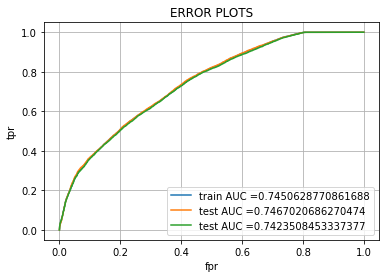

In [43]:
from sklearn.metrics import roc_curve, auc
#bootstrap_type='Bayesian',
cate_features_index=np.where(x.dtypes != float)[0]
model = CatBoostClassifier(learning_rate=0.010533212435393888,
                           l2_leaf_reg = 2.6337576032130827,
                           depth=3,
                           boosting_type= 'Ordered',
                           verbose=0,
                           max_ctr_complexity = 1)

model.fit(x_train,y_train,cat_features=cate_features_index)


y_train_pred = model.predict_proba(x_train)    
y_test_pred = model.predict_proba(x_test)
y_cv_pred = model.predict_proba(x_cv)



train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )



plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="test AUC ="+str(auc(cv_fpr, cv_tpr)))


plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Catboost - LogLoss and Classification Report

train log loss: 0.5723370461792925
test log loss: 0.571398332372302
cv log loss: 0.5738145244205124
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.66      0.88      0.75    129520
           1       0.71      0.40      0.51     96521

    accuracy                           0.67    226041
   macro avg       0.68      0.64      0.63    226041
weighted avg       0.68      0.67      0.65    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.66      0.88      0.75     40476
           1       0.71      0.40      0.51     3016

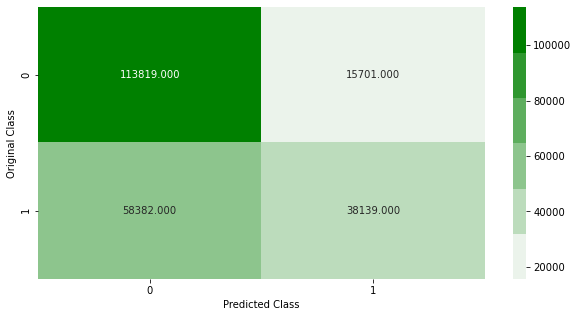

-------------------------------------------------- Precision matrix --------------------------------------------------


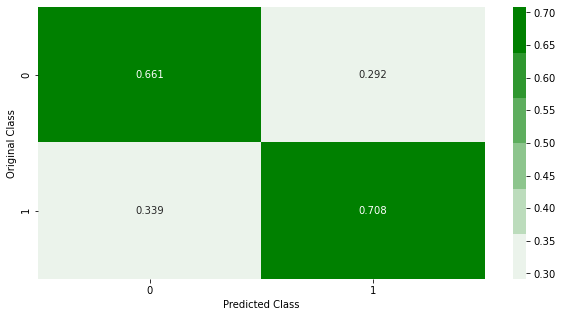

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


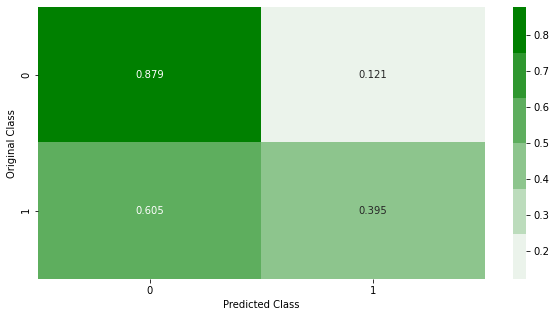

Sum of rows in precision matrix [1. 1.]
_test__test__test__test__test__test__test__test__test__test_
Number of misclassified points  32.6731692124747
-------------------------------------------------- Confusion matrix --------------------------------------------------


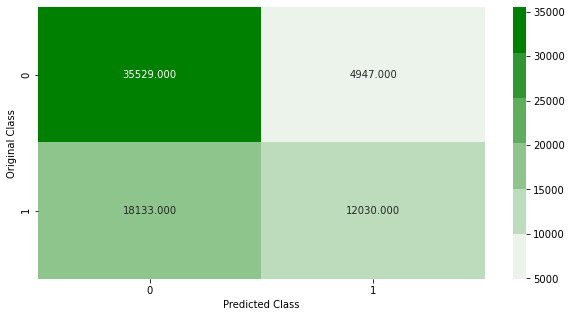

-------------------------------------------------- Precision matrix --------------------------------------------------


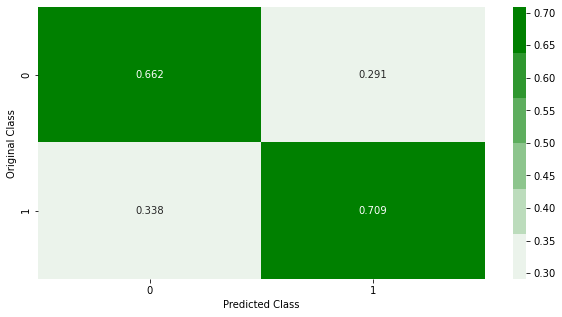

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


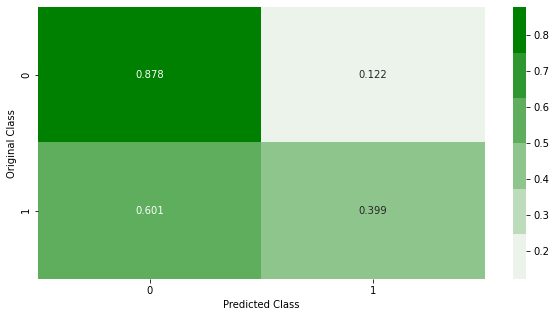

Sum of rows in precision matrix [1. 1.]
_cv__cv__cv__cv__cv__cv__cv__cv__cv__cv_
Number of misclassified points  32.88032418467201
-------------------------------------------------- Confusion matrix --------------------------------------------------


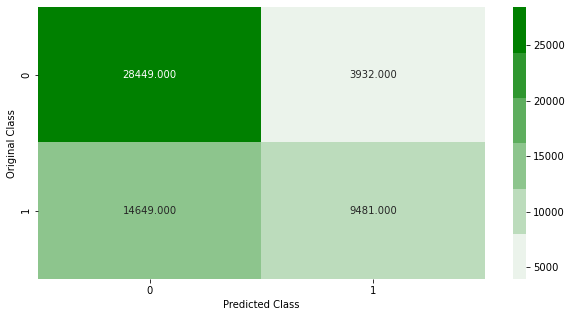

-------------------------------------------------- Precision matrix --------------------------------------------------


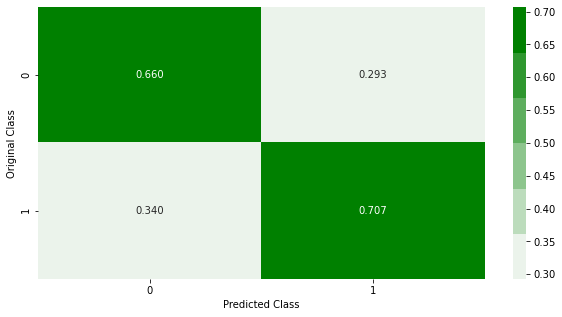

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


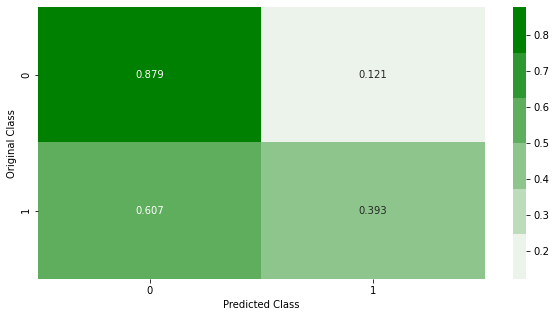

Sum of rows in precision matrix [1. 1.]


array([[28449,  3932],
       [14649,  9481]], dtype=int64)

In [44]:
predict_y = model.predict_proba(x_train)
print("train log loss:", log_loss(y_train, predict_y, eps=1e-15))
predict_y = model.predict_proba(x_test)
print("test log loss:", log_loss(y_test, predict_y, eps=1e-15))
predict_y = model.predict_proba(x_cv)
print("cv log loss:", log_loss(y_cv, predict_y, eps=1e-15))



print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, model.predict(x_train)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, model.predict(x_test)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, model.predict(x_cv)))


print('_train_'*10)
plot_confusion_matrix(y_train, model.predict(x_train))
confusion_matrix(y_train, model.predict(x_train))


print('_test_'*10)
plot_confusion_matrix(y_test,  model.predict(x_test))
confusion_matrix(y_test,  model.predict(x_test))

print('_cv_'*10)
plot_confusion_matrix(y_cv, model.predict(x_cv))
confusion_matrix(y_cv, model.predict(x_cv))

## CatBoost - Observation

* F1.Score and recall for Class 1 is very low.

# RandomForestClassifier


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

## RandomForest - Hyperparameter tunning

In [25]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def objective(trial):

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 50, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,2000)
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample"])
    
    
    rf = RandomForestClassifier(criterion =criterion,
                                max_depth=max_depth, 
                                n_estimators=n_estimators,
                                class_weight=class_weight)

    score = cross_val_score(rf, x_train_hstack, y, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2021-09-02 02:42:17,384] A new study created in memory with name: no-name-f1237f36-1155-4f48-9119-d1f652c87e50


KeyboardInterrupt: 

In [ ]:
# 3 trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
# Best hyperparameters: {'criterion': 'entropy', 'max_depth': 32, 'n_estimators': 256}- best of now

#Accuracy: 0.859340425398431
Best hyperparameters: {'criterion': 'gini', 'max_depth': 32, 'n_estimators': 1883, 'class_weight': 'balanced_subsample'}

## RandomForest -  AUC Curve

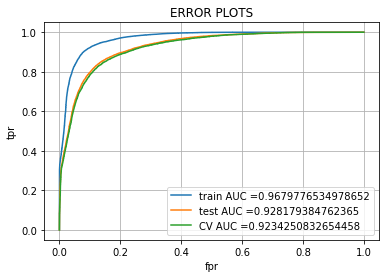

In [46]:
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(criterion = 'gini',
                          max_depth=32,
                          class_weight='balanced_subsample',
                          n_estimators=1883,
                          random_state=0, 
                          n_jobs=-1)
model.fit(x_train_hstack, y_train)

y_train_pred = model.predict_proba(x_train_hstack)    
y_test_pred = model.predict_proba(x_test_hstack)
y_cv_pred = model.predict_proba(x_cv_hstack)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )



plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## RandomForest - LogLos and Classification Report

train log loss: 0.4356296906088583
test log loss: 0.46484701958498026
cv log loss: 0.46863444518556635
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92    129520
           1       0.87      0.92      0.90     96521

    accuracy                           0.91    226041
   macro avg       0.91      0.91      0.91    226041
weighted avg       0.91      0.91      0.91    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     40476
           1       0.81      0.86      0.84     3

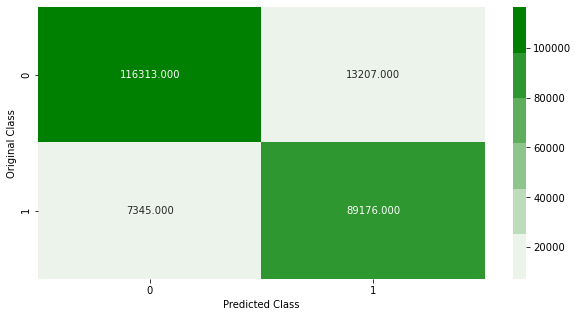

-------------------------------------------------- Precision matrix --------------------------------------------------


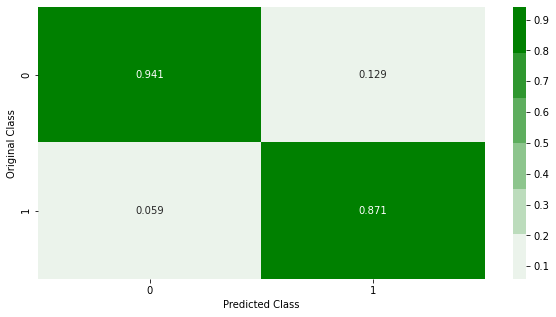

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


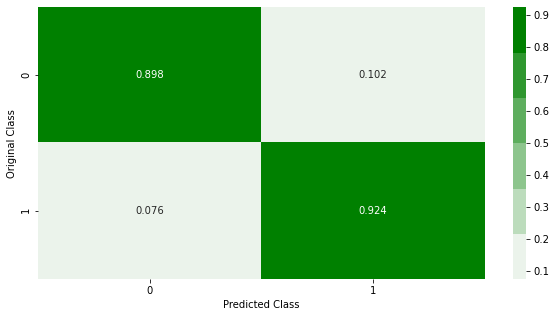

Sum of rows in precision matrix [1. 1.]
_test__test__test__test__test__test__test__test__test__test_
Number of misclassified points  14.533048316086013
-------------------------------------------------- Confusion matrix --------------------------------------------------


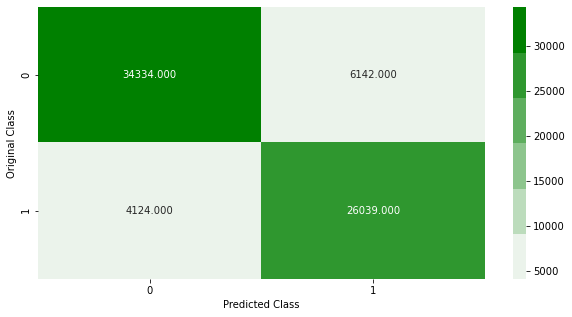

-------------------------------------------------- Precision matrix --------------------------------------------------


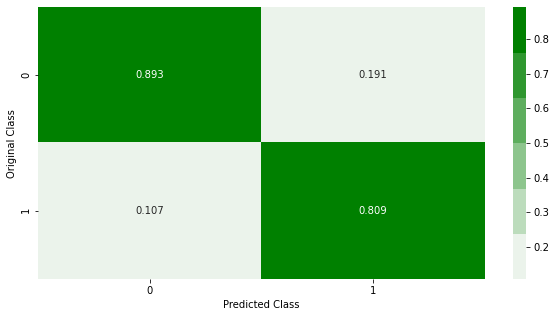

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


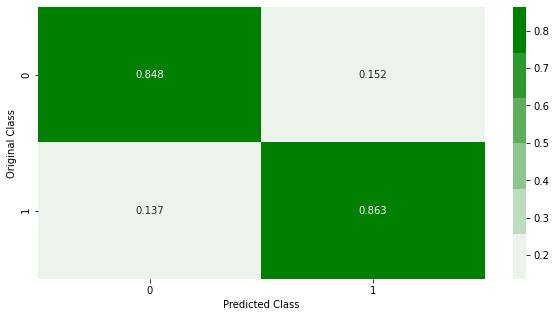

Sum of rows in precision matrix [1. 1.]
_cv__cv__cv__cv__cv__cv__cv__cv__cv__cv_
Number of misclassified points  15.041319389145476
-------------------------------------------------- Confusion matrix --------------------------------------------------


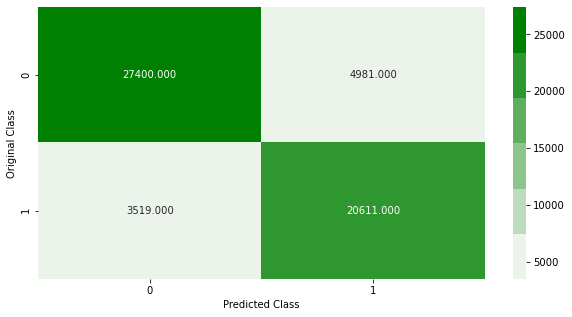

-------------------------------------------------- Precision matrix --------------------------------------------------


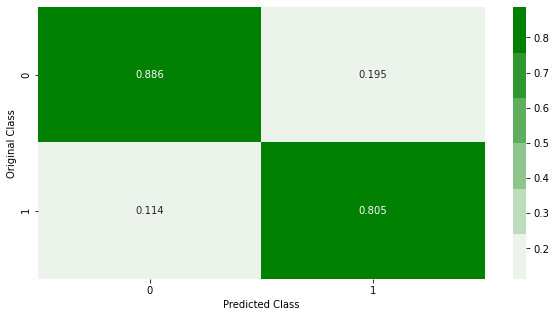

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


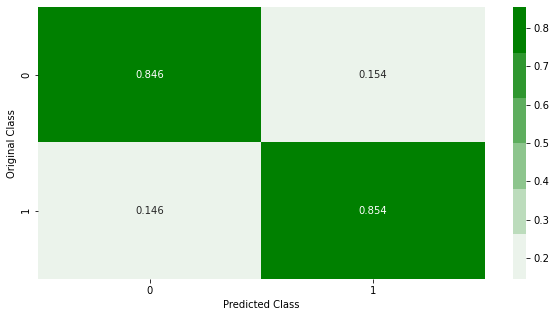

Sum of rows in precision matrix [1. 1.]


array([[27400,  4981],
       [ 3519, 20611]], dtype=int64)

In [47]:

predict_y = model.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y,labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,labels=model.classes_, eps=1e-15))



print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, model.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, model.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, model.predict(x_cv_hstack)))


print('_train_'*10)
plot_confusion_matrix(y_train, model.predict(x_train_hstack))
confusion_matrix(y_train, model.predict(x_train_hstack))


print('_test_'*10)
plot_confusion_matrix(y_test,  model.predict(x_test_hstack))
confusion_matrix(y_test,  model.predict(x_test_hstack))

print('_cv_'*10)
plot_confusion_matrix(y_cv, model.predict(x_cv_hstack))
confusion_matrix(y_cv, model.predict(x_cv_hstack))



## RandomForest - Observation

* Both the class has balanced f1 and recall 

# XGBClassifier

In [14]:
import xgboost as xgb

In [ ]:
ml = xgb.XGBClassifier(tree_method='gpu_hist')
CV = GridSearchCV(estimator = ml, param_grid=rf_grid, cv = 10, verbose = 20,  n_jobs = -1)
CV.fit(x_train_hstack, y_train)

## XGB- Hyperparameter tunning

In [ ]:
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000],
              'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
ml = xgb.XGBClassifier()
CV = GridSearchCV(ml, parameters, 
                  return_train_score=True, 
                  cv=10, 
                  scoring='roc_auc_ovr_weighted',
                  error_score='raise',
                  n_jobs=-1,
                  verbose=5)
CV.fit(x_train_hstack, y_train)

In [212]:
# different dataset
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score


def objective(trial):
   
    
    #n_estimators = trial.suggest_int("n_estimators", 200,5000)    
    max_depth = trial.suggest_int("max_depth", 2, 55, log=True)  
    min_child_weight = trial.suggest_int("min_child_weight", 2, 10)
    eta = trial.suggest_float("eta", 1e-8, 1.0, log=True)
    gamma = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    grow_policy = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide",])
    sample_type = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
    normalize_type = trial.suggest_categorical("normalize_type", ["tree", "forest"])
    rate_drop = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
    skip_drop = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    eval_metric = trial.suggest_categorical("eval_metric", ["logloss", "auc"])
    
    rf =  xgb.XGBClassifier(
                            max_depth=max_depth,
                           gamma=gamma,
                           grow_policy=grow_policy,
                           sample_type=sample_type,
                           eval_metric=eval_metric)

    score = cross_val_score(rf, x_train_hstack, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2021-09-02 18:15:38,832] A new study created in memory with name: no-name-e4a21ac9-289f-49ad-b9b1-a568af37fb52
[I 2021-09-02 18:15:45,684] Trial 0 finished with value: 0.6833494808463952 and parameters: {'max_depth': 3, 'min_child_weight': 7, 'eta': 5.2469733978223484e-05, 'gamma': 4.1138316525002246e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.04548885506972683, 'skip_drop': 0.758226453808379, 'eval_metric': 'logloss'}. Best is trial 0 with value: 0.6833494808463952.
[I 2021-09-02 18:16:13,833] Trial 1 finished with value: 0.8931609752213094 and parameters: {'max_depth': 23, 'min_child_weight': 5, 'eta': 0.03980609562755856, 'gamma': 1.6644790239828074e-06, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 8.001728439465775e-07, 'skip_drop': 3.313084519060759e-08, 'eval_metric': 'logloss'}. Best is trial 1 with value: 0.8931609752213094.
[I 2021-09-02 18:16:47,882] Trial 2 finishe

[I 2021-09-02 18:26:54,711] Trial 19 finished with value: 0.8786768772036933 and parameters: {'max_depth': 21, 'min_child_weight': 3, 'eta': 0.10230589694899972, 'gamma': 1.0947386245436517e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.08453948715568968, 'skip_drop': 6.41108038753377e-05, 'eval_metric': 'auc'}. Best is trial 17 with value: 0.9383563158895952.
[I 2021-09-02 18:27:05,196] Trial 20 finished with value: 0.7571325555983206 and parameters: {'max_depth': 9, 'min_child_weight': 5, 'eta': 0.021602625299894162, 'gamma': 0.0003789084543066432, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0016286420742050618, 'skip_drop': 1.354732205526398e-08, 'eval_metric': 'auc'}. Best is trial 17 with value: 0.9383563158895952.
[I 2021-09-02 18:28:01,691] Trial 21 finished with value: 0.9322202609261151 and parameters: {'max_depth': 44, 'min_child_weight': 2, 'eta': 0.25912389804867353, 'g

[I 2021-09-02 18:41:18,176] Trial 38 finished with value: 0.8424975999929215 and parameters: {'max_depth': 16, 'min_child_weight': 4, 'eta': 0.005206249194900576, 'gamma': 0.00013914931847638026, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.009909473440025853, 'skip_drop': 0.025921902264000072, 'eval_metric': 'logloss'}. Best is trial 23 with value: 0.9385952106033861.
[I 2021-09-02 18:41:46,756] Trial 39 finished with value: 0.8931609752213094 and parameters: {'max_depth': 23, 'min_child_weight': 7, 'eta': 0.9286193318000945, 'gamma': 1.4017619039926752e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.003776899887622066, 'skip_drop': 0.18451733347113322, 'eval_metric': 'logloss'}. Best is trial 23 with value: 0.9385952106033861.
[I 2021-09-02 18:42:40,154] Trial 40 finished with value: 0.9204038205458301 and parameters: {'max_depth': 32, 'min_child_weight': 9, 'eta': 0.00078862393

In [213]:
# 3 trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9387456257935507
Best hyperparameters: {'max_depth': 55, 'min_child_weight': 3, 'eta': 0.07222407975146347, 'gamma': 0.00043544406754126674, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.40698977540095266, 'skip_drop': 0.004272019253290206, 'eval_metric': 'auc'}


In [148]:
# 3 trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8767162144436935
Best hyperparameters: {'max_depth': 8, 'min_child_weight': 5, 'eta': 3.729528007942637e-07, 'gamma': 1.522047754236919e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.2014152068012867e-07, 'skip_drop': 3.1428123848985633e-06, 'eval_metric': 'auc'}


In [149]:
optuna.visualization.plot_optimization_history(study)

In [103]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score


def objective(trial):
   
    
    #n_estimators = trial.suggest_int("n_estimators", 200,5000)    
    max_depth = trial.suggest_int("max_depth", 2, 55, log=True)  
    min_child_weight = trial.suggest_int("min_child_weight", 2, 10)
    eta = trial.suggest_float("eta", 1e-8, 1.0, log=True)
    gamma = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    grow_policy = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide",])
    sample_type = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
    normalize_type = trial.suggest_categorical("normalize_type", ["tree", "forest"])
    rate_drop = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
    skip_drop = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    eval_metric = trial.suggest_categorical("eval_metric", ["logloss", "auc"])
    
    rf =  xgb.XGBClassifier(
                            max_depth=max_depth,
                           gamma=gamma,
                           grow_policy=grow_policy,
                           sample_type=sample_type,
                           eval_metric=eval_metric)

    score = cross_val_score(rf, x_train_hstack, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2021-09-02 11:29:24,103] A new study created in memory with name: no-name-7b010f3e-8e54-4d03-8cf9-2ef40fa65bbf


KeyboardInterrupt: 

In [76]:
# 3 trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9378357883279937
Best hyperparameters: {'max_depth': 55, 'min_child_weight': 6, 'eta': 1.6580684211096754e-08, 'gamma': 0.012513369844152007, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.60843388792103, 'skip_drop': 2.4056947006644897e-06, 'eval_metric': 'auc'}


In [77]:
optuna.visualization.plot_optimization_history(study)

In [78]:
optuna.visualization.plot_slice(study)

In [224]:
# 50 trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9387456257935507
Best hyperparameters: {'max_depth': 55, 'min_child_weight': 3, 'eta': 0.07222407975146347, 'gamma': 0.00043544406754126674, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.40698977540095266, 'skip_drop': 0.004272019253290206, 'eval_metric': 'auc'}


In [ ]:
accuracy: 0.9387456257935507
Best hyperparameters: {'max_depth': 55, 
                       'min_child_weight': 3, 
                       'eta': 0.07222407975146347, 
                       'gamma': 0.00043544406754126674, 
                       'grow_policy': 'depthwise', 
                       'sample_type': 'weighted', 
                       'normalize_type': 'forest', 
                       'rate_drop': 0.40698977540095266,
                       'skip_drop': 0.004272019253290206,
                       'eval_metric': 'auc'}

## XGB - AUC Curve

[23:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_master/src/learner.cc:572: 
Parameters: { "normalize_type", "rate_drop", "sample_type", "skip_drop" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




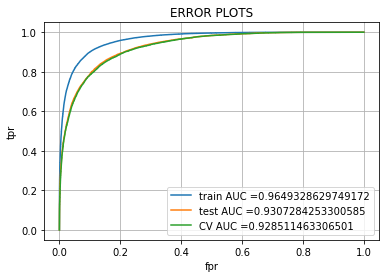

In [17]:
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
model = xgb.XGBClassifier(
                          min_child_weight=8,
                          eta=0.19634386296489983,
                          gamma=0.0006778041910982136,
                          grow_policy='depthwise',
                          sample_type ='uniform', 
                          normalize_type='forest',
                          rate_drop = 0.914253769205017,
                          skip_drop = 0.002278123245181394,
                          max_depth=28, 
                          eval_metric='logloss',
                          random_state=0, 
                          n_jobs=-1)
model.fit(x_train_hstack, y_train)
y_train_pred = model.predict_proba(x_train_hstack)    
y_test_pred = model.predict_proba(x_test_hstack)
y_cv_pred = model.predict_proba(x_cv_hstack)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## XGB Logloss and Classification report

In [18]:

predict_y = model.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y,labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,labels=model.classes_, eps=1e-15))


print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, model.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, model.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, model.predict(x_cv_hstack)))


train log loss: 0.30886164233325836
test log loss: 0.35976497407551095
cv log loss: 0.3636042130680906
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    129520
           1       0.90      0.85      0.88     96521

    accuracy                           0.90    226041
   macro avg       0.90      0.89      0.90    226041
weighted avg       0.90      0.90      0.90    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     40476
           1       0.85      0.79      0.82     3

## XGB - Observation

* Both the classes are has good f1 score and recall. 

# LGBMClassifier

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train_hstack, y_train)
y_pred=clf.predict(x_test_hstack)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(clf.score(x_train_hstack, y_train)))
print('Test set score: {:.4f}'.format(clf.score(x_test_hstack, y_test)))

## LGBM -Hyperparameter 

In [106]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score


def objective(trial):
    metric = trial.suggest_categorical("metric", ["binary_logloss"])
    lambda_l1= trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
    lambda_l2 = trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
    num_leaves= trial.suggest_int("num_leaves", 2, 256),
    boosting_type = trial.suggest_categorical("boosting_type", ["gbdt"]),
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1),
    
#    n_estimators = trial.suggest_int("n_estimators", 200,1000)   , 
    max_depth = trial.suggest_int("max_depth", 2, 55, log=True) ,
    feature_fraction = trial.suggest_float("feature_fraction", 0.4, 1.0),
    bagging_fraction = trial.suggest_float("bagging_fraction", 0.4, 1.0),
    bagging_freq = trial.suggest_int("bagging_freq", 1, 7),
    
    rf =  lgb.LGBMClassifier(boosting_type=boosting_type,
                             num_leaves=num_leaves, 
                             feature_fraction =feature_fraction,
                             bagging_fraction=bagging_fraction,
                             bagging_freq=bagging_freq,
                             max_depth =max_depth,
                            
                             lambda_l1= lambda_l1,
                             lambda_l2=lambda_l2)

    score = cross_val_score(rf, x_train_hstack, y_train, n_jobs=-1, cv=10)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

[I 2021-08-18 19:47:30,592] A new study created in memory with name: no-name-a079e9a0-65a9-4250-bd11-79cfe521d992
[I 2021-08-18 19:47:39,476] Trial 0 finished with value: 0.7053142058325998 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 1.0418275724498859e-05, 'lambda_l2': 0.0010596419918538328, 'num_leaves': 43, 'boosting_type': 'gbdt', 'learning_rate': 0.011942859002093539, 'max_depth': 11, 'feature_fraction': 0.6428143247539784, 'bagging_fraction': 0.8812800547421233, 'bagging_freq': 6}. Best is trial 0 with value: 0.7053142058325998.
[I 2021-08-18 19:47:42,742] Trial 1 finished with value: 0.6568237767648306 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 0.010983184638238335, 'lambda_l2': 0.15814146544811522, 'num_leaves': 3, 'boosting_type': 'gbdt', 'learning_rate': 0.06840044635871424, 'max_depth': 12, 'feature_fraction': 0.7741011719579675, 'bagging_fraction': 0.9880169723548851, 'bagging_freq': 1}. Best is trial 0 with value: 0.7053142058325998.
[I 2021-08

[I 2021-08-18 19:51:16,067] Trial 18 finished with value: 0.7381233338298626 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 0.24113741014151555, 'lambda_l2': 0.0001093088043473236, 'num_leaves': 123, 'boosting_type': 'gbdt', 'learning_rate': 0.06958615198431076, 'max_depth': 15, 'feature_fraction': 0.8703714205179695, 'bagging_fraction': 0.6122184966690168, 'bagging_freq': 5}. Best is trial 17 with value: 0.7709057520294926.
[I 2021-08-18 19:51:19,806] Trial 19 finished with value: 0.6600196699464188 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 0.9864908309992944, 'lambda_l2': 0.0003992218602834202, 'num_leaves': 180, 'boosting_type': 'gbdt', 'learning_rate': 0.04911177131486477, 'max_depth': 2, 'feature_fraction': 0.9385938726396302, 'bagging_fraction': 0.7791007619761011, 'bagging_freq': 4}. Best is trial 17 with value: 0.7709057520294926.
[I 2021-08-18 19:51:34,306] Trial 20 finished with value: 0.7739147132799233 and parameters: {'metric': 'binary_logloss', 

[I 2021-08-18 19:55:19,029] Trial 37 finished with value: 0.6670613280181279 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 5.068133049118848e-07, 'lambda_l2': 7.406741649429437e-06, 'num_leaves': 229, 'boosting_type': 'gbdt', 'learning_rate': 0.02648037191534411, 'max_depth': 3, 'feature_fraction': 0.6048446391093588, 'bagging_fraction': 0.7212479951840588, 'bagging_freq': 6}. Best is trial 26 with value: 0.7768791426154961.
[I 2021-08-18 19:55:30,492] Trial 38 finished with value: 0.7343220925335437 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 5.1581114963263715e-08, 'lambda_l2': 1.1060140314560866e-06, 'num_leaves': 106, 'boosting_type': 'gbdt', 'learning_rate': 0.016147768024152027, 'max_depth': 45, 'feature_fraction': 0.5477428666656334, 'bagging_fraction': 0.5644539483956769, 'bagging_freq': 6}. Best is trial 26 with value: 0.7768791426154961.
[I 2021-08-18 19:55:42,850] Trial 39 finished with value: 0.7568669343185876 and parameters: {'metric': 'binary_lo

[I 2021-08-18 19:59:23,422] Trial 55 finished with value: 0.7803065075679154 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 3.7673539281582264e-05, 'lambda_l2': 1.756184198121699e-08, 'num_leaves': 246, 'boosting_type': 'gbdt', 'learning_rate': 0.037336120595479846, 'max_depth': 33, 'feature_fraction': 0.8553735210313086, 'bagging_fraction': 0.7430487696990031, 'bagging_freq': 3}. Best is trial 42 with value: 0.7803376594226682.
[I 2021-08-18 19:59:37,780] Trial 56 finished with value: 0.7739236073001831 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 3.175906381624267e-05, 'lambda_l2': 1.0010394307937155e-08, 'num_leaves': 223, 'boosting_type': 'gbdt', 'learning_rate': 0.036643488411531734, 'max_depth': 27, 'feature_fraction': 0.8550485550693758, 'bagging_fraction': 0.8527210809576456, 'bagging_freq': 3}. Best is trial 42 with value: 0.7803376594226682.
[I 2021-08-18 19:59:52,281] Trial 57 finished with value: 0.7805557689642287 and parameters: {'metric': 'binary_

[I 2021-08-18 20:02:53,439] Trial 73 finished with value: 0.7841611807429635 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 3.942045931792919e-05, 'lambda_l2': 7.252393731586297e-07, 'num_leaves': 255, 'boosting_type': 'gbdt', 'learning_rate': 0.027675767296299073, 'max_depth': 37, 'feature_fraction': 0.9250840661032761, 'bagging_fraction': 0.770898111190374, 'bagging_freq': 2}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:03:09,021] Trial 74 finished with value: 0.7840276258111887 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 3.11266439338118e-06, 'lambda_l2': 6.9852100204638725e-06, 'num_leaves': 255, 'boosting_type': 'gbdt', 'learning_rate': 0.02781417404013962, 'max_depth': 37, 'feature_fraction': 0.9308263268731728, 'bagging_fraction': 0.7715983404727692, 'bagging_freq': 2}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:03:24,744] Trial 75 finished with value: 0.7819534145594415 and parameters: {'metric': 'binary_logl

[I 2021-08-18 20:07:12,488] Trial 91 finished with value: 0.7815884411512187 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 4.4625214024069224e-07, 'lambda_l2': 4.0217086526061906e-06, 'num_leaves': 256, 'boosting_type': 'gbdt', 'learning_rate': 0.03156925969585284, 'max_depth': 25, 'feature_fraction': 0.9515948310323605, 'bagging_fraction': 0.8280892379882061, 'bagging_freq': 2}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:07:27,609] Trial 92 finished with value: 0.7728375703972737 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 5.675601587557553e-06, 'lambda_l2': 7.834681548571124e-05, 'num_leaves': 250, 'boosting_type': 'gbdt', 'learning_rate': 0.02986990662419017, 'max_depth': 20, 'feature_fraction': 0.9403795684608909, 'bagging_fraction': 0.8648933349179484, 'bagging_freq': 2}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:07:42,736] Trial 93 finished with value: 0.7793183663051814 and parameters: {'metric': 'binary_lo

[I 2021-08-18 20:11:17,690] Trial 109 finished with value: 0.7836270525474812 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 0.00017509623046919388, 'lambda_l2': 0.001596528623464044, 'num_leaves': 252, 'boosting_type': 'gbdt', 'learning_rate': 0.0138819879296663, 'max_depth': 42, 'feature_fraction': 0.9345094872672082, 'bagging_fraction': 0.7704400821068264, 'bagging_freq': 3}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:11:36,163] Trial 110 finished with value: 0.7641400667366927 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 0.00016721406048871598, 'lambda_l2': 0.0021976362066312423, 'num_leaves': 251, 'boosting_type': 'gbdt', 'learning_rate': 0.015627067642525395, 'max_depth': 47, 'feature_fraction': 0.47560985207310846, 'bagging_fraction': 0.7453270033092295, 'bagging_freq': 3}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:11:50,734] Trial 111 finished with value: 0.7795542791425307 and parameters: {'metric': 'binary

[I 2021-08-18 20:15:52,147] Trial 127 finished with value: 0.7594263501164161 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 2.578554059066395e-07, 'lambda_l2': 0.0013405506018674942, 'num_leaves': 153, 'boosting_type': 'gbdt', 'learning_rate': 0.017160291822849283, 'max_depth': 52, 'feature_fraction': 0.9462288847582351, 'bagging_fraction': 0.8239892334806995, 'bagging_freq': 3}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:16:01,610] Trial 128 finished with value: 0.7807649561543146 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 1.0952364160539856e-07, 'lambda_l2': 0.004923366105730696, 'num_leaves': 241, 'boosting_type': 'gbdt', 'learning_rate': 0.021393833578286083, 'max_depth': 48, 'feature_fraction': 0.8662539901722324, 'bagging_fraction': 0.8363196865820858, 'bagging_freq': 1}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:16:17,967] Trial 129 finished with value: 0.7831240664988531 and parameters: {'metric': 'binary

[I 2021-08-18 20:20:33,027] Trial 146 finished with value: 0.7824741892429501 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 1.3182892555977046e-07, 'lambda_l2': 0.0031661711513709992, 'num_leaves': 256, 'boosting_type': 'gbdt', 'learning_rate': 0.019365122256172686, 'max_depth': 35, 'feature_fraction': 0.852443064134161, 'bagging_fraction': 0.8350771998986773, 'bagging_freq': 2}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:20:48,279] Trial 147 finished with value: 0.7830083414109985 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 2.886466202791631e-07, 'lambda_l2': 0.005563209964983277, 'num_leaves': 247, 'boosting_type': 'gbdt', 'learning_rate': 0.016710469648000704, 'max_depth': 51, 'feature_fraction': 0.9021949903384945, 'bagging_fraction': 0.8144829032402414, 'bagging_freq': 2}. Best is trial 71 with value: 0.7851226147836297.
[I 2021-08-18 20:20:58,092] Trial 148 finished with value: 0.7672736411516261 and parameters: {'metric': 'binary_

[I 2021-08-18 20:25:24,151] Trial 164 finished with value: 0.785046947656131 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 6.60935138879134e-06, 'lambda_l2': 0.02670383753623014, 'num_leaves': 256, 'boosting_type': 'gbdt', 'learning_rate': 0.018771230998229017, 'max_depth': 51, 'feature_fraction': 0.9982017227268102, 'bagging_fraction': 0.8943021810046163, 'bagging_freq': 2}. Best is trial 157 with value: 0.7860395224568087.
[I 2021-08-18 20:25:38,253] Trial 165 finished with value: 0.7806003016715681 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 1.2019032094320893e-06, 'lambda_l2': 0.04123306320397622, 'num_leaves': 237, 'boosting_type': 'gbdt', 'learning_rate': 0.018403552893543163, 'max_depth': 52, 'feature_fraction': 0.9945575654862066, 'bagging_fraction': 0.9131721973198695, 'bagging_freq': 2}. Best is trial 157 with value: 0.7860395224568087.
[I 2021-08-18 20:25:53,313] Trial 166 finished with value: 0.7839519674009867 and parameters: {'metric': 'binary_lo

[I 2021-08-18 20:30:07,343] Trial 182 finished with value: 0.7858882109856555 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 4.008648046709186e-06, 'lambda_l2': 0.014223691294697728, 'num_leaves': 256, 'boosting_type': 'gbdt', 'learning_rate': 0.021692879506174195, 'max_depth': 48, 'feature_fraction': 0.9998286368650229, 'bagging_fraction': 0.8726465932556862, 'bagging_freq': 2}. Best is trial 157 with value: 0.7860395224568087.
[I 2021-08-18 20:30:22,422] Trial 183 finished with value: 0.7851849230499044 and parameters: {'metric': 'binary_logloss', 'lambda_l1': 5.464492262856426e-06, 'lambda_l2': 0.01563821294899953, 'num_leaves': 256, 'boosting_type': 'gbdt', 'learning_rate': 0.0227526734268406, 'max_depth': 49, 'feature_fraction': 0.999505277182459, 'bagging_fraction': 0.8748869957271893, 'bagging_freq': 2}. Best is trial 157 with value: 0.7860395224568087.
[I 2021-08-18 20:30:37,061] Trial 184 finished with value: 0.7829994380790809 and parameters: {'metric': 'binary_log

In [101]:
# 3 trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


Accuracy: 0.7835558256940194
Best hyperparameters: {'metric': 'binary_logloss', 'lambda_l1': 0.0001347937788118403, 'lambda_l2': 5.617305772718717e-06, 'num_leaves': 255, 'boosting_type': 'gbdt', 'learning_rate': 0.06889792426004177, 'max_depth': 33, 'feature_fraction': 0.8881632929126936, 'bagging_fraction': 0.8038136064392282, 'bagging_freq': 1}


In [107]:
# 3 trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.7860395224568087
Best hyperparameters: {'metric': 'binary_logloss', 'lambda_l1': 5.3893484721768095e-06, 'lambda_l2': 0.014565907238525072, 'num_leaves': 256, 'boosting_type': 'gbdt', 'learning_rate': 0.025607482907234802, 'max_depth': 51, 'feature_fraction': 0.9473358666338227, 'bagging_fraction': 0.8470039552815838, 'bagging_freq': 2}


In [105]:
optuna.visualization.plot_optimization_history(study)

In [108]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
Best hyperparameters: {'metric': 'binary_logloss', '
                       lambda_l1': 5.3893484721768095e-06, \
                       'lambda_l2': 0.014565907238525072,
                       'num_leaves': 256, 'boosting_type': 
                       'gbdt', 'learning_rate': 0.025607482907234802, 
                       'max_depth': 51, 'feature_fraction': 0.9473358666338227,
                       'bagging_fraction': 0.8470039552815838, 
                       'bagging_freq': 2}


## LGBM - AUC CURVE

[LightGBM] [Warning] feature_fraction is set=0.9473358666338227, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9473358666338227
[LightGBM] [Warning] lambda_l1 is set=5.3893484721768095e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.3893484721768095e-06
[LightGBM] [Warning] bagging_fraction is set=0.8470039552815838, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8470039552815838
[LightGBM] [Warning] lambda_l2 is set=0.014565907238525072, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014565907238525072
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


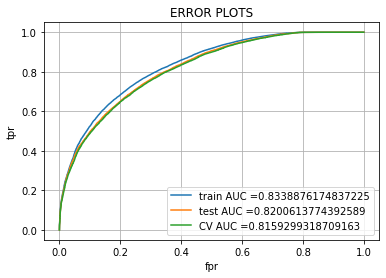

In [48]:
from sklearn.metrics import roc_curve, auc
import lightgbm as lgb
model = lgb.LGBMClassifier(metric = 'binary_logloss',
                        lambda_l1 = 0.0000053893484721768095,
                        lambda_l2 = 0.014565907238525072,
                        num_leaves= 256,
                        boosting_type = 'gbdt',
                        learning_rate = 0.025607482907234802,
                        max_depth = 51,
                        feature_fraction = 0.9473358666338227,
                        bagging_fraction =0.8470039552815838,
                        bagging_freq = 2)
model.fit(x_train_hstack, y_train)
y_train_pred = model.predict_proba(x_train_hstack)   
y_test_pred = model.predict_proba(x_test_hstack)
y_cv_pred = model.predict_proba(x_cv_hstack)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )



plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## LGBM - LogLoss and Classification report

train log loss: 0.5129041661236282
test log loss: 0.5204862110088948
cv log loss: 0.5239490544982633
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.72      0.89      0.80    129520
           1       0.79      0.54      0.64     96521

    accuracy                           0.74    226041
   macro avg       0.76      0.72      0.72    226041
weighted avg       0.75      0.74      0.73    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.71      0.88      0.79     40476
           1       0.77      0.53      0.63     301

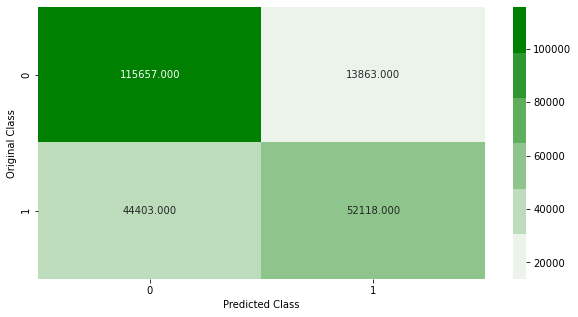

-------------------------------------------------- Precision matrix --------------------------------------------------


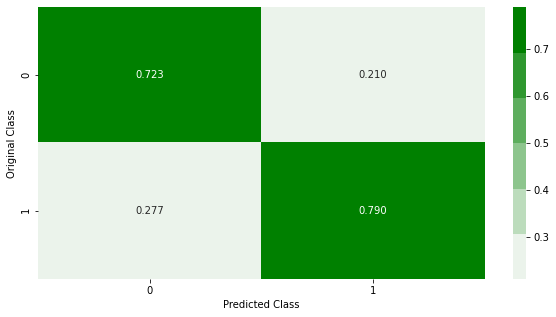

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


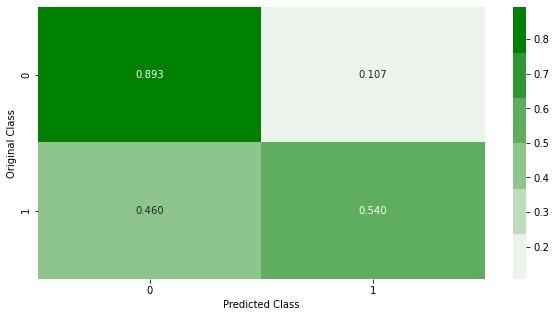

Sum of rows in precision matrix [1. 1.]
_test__test__test__test__test__test__test__test__test__test_
Number of misclassified points  26.925635980124298
-------------------------------------------------- Confusion matrix --------------------------------------------------


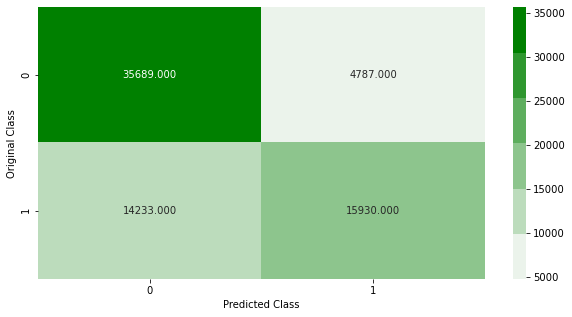

-------------------------------------------------- Precision matrix --------------------------------------------------


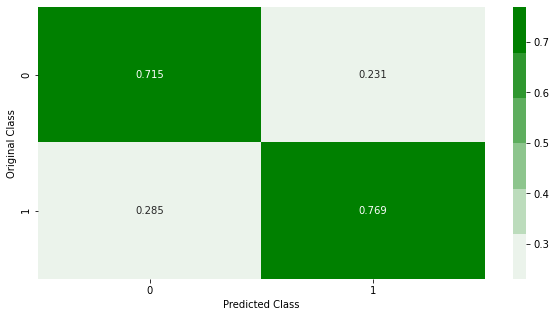

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


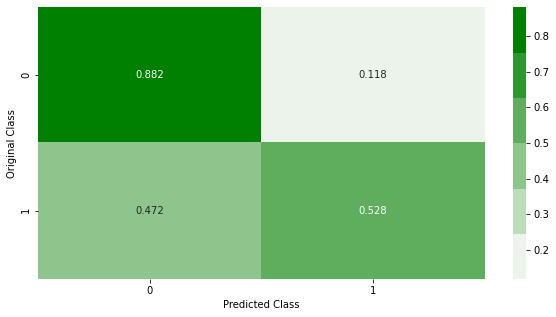

Sum of rows in precision matrix [1. 1.]
_cv__cv__cv__cv__cv__cv__cv__cv__cv__cv_
Number of misclassified points  27.23540549627506
-------------------------------------------------- Confusion matrix --------------------------------------------------


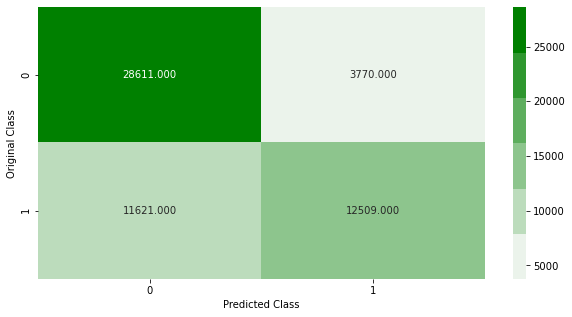

-------------------------------------------------- Precision matrix --------------------------------------------------


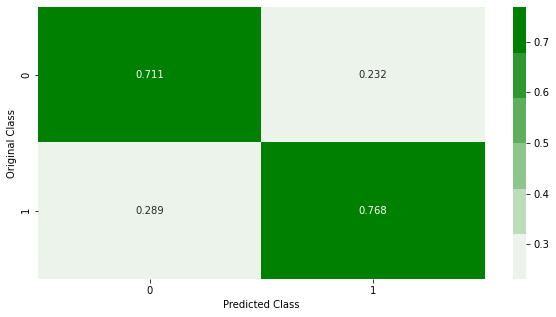

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


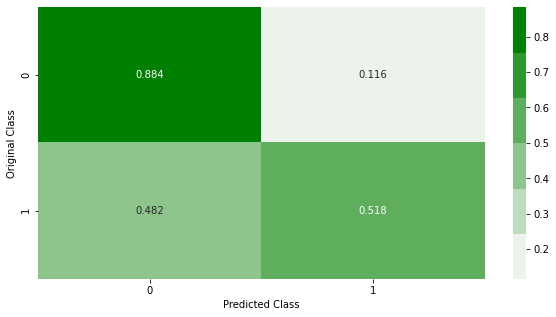

Sum of rows in precision matrix [1. 1.]


array([[28611,  3770],
       [11621, 12509]], dtype=int64)

In [49]:
predict_y = model.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y,labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,labels=model.classes_, eps=1e-15))



print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, model.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, model.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, model.predict(x_cv_hstack)))

print('_train_'*10)
plot_confusion_matrix(y_train, model.predict(x_train_hstack))
confusion_matrix(y_train, model.predict(x_train_hstack))


print('_test_'*10)
plot_confusion_matrix(y_test,  model.predict(x_test_hstack))
confusion_matrix(y_test,  model.predict(x_test_hstack))

print('_cv_'*10)
plot_confusion_matrix(y_cv, model.predict(x_cv_hstack))
confusion_matrix(y_cv, model.predict(x_cv_hstack))

## LGBM- Observation

* Class 1 has low f1 and recall 

# AdaBoostClassifier

## ADABoost - Hyperparameter

In [24]:
from sklearn.ensemble import AdaBoostClassifier

import optuna

from sklearn.model_selection import cross_val_score


def objective(trial):
   
    
    n_estimators = trial.suggest_int("n_estimators", 200,1000)    

    learning_rate = trial.suggest_float("learning_rate", 1e-8, 1.0, log=True)

    algorithm = trial.suggest_categorical("algorithm", ["SAMME", "SAMME.R"])
    
    rf =  AdaBoostClassifier(n_estimators=n_estimators,
                         learning_rate =learning_rate,
                           algorithm=algorithm)

    score = cross_val_score(rf, x_train_hstack, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


[I 2021-08-26 15:34:05,312] A new study created in memory with name: no-name-6e74de1d-364d-4f4a-b6fb-cd73bfc60d83
[I 2021-08-26 15:35:29,051] Trial 0 finished with value: 0.620676306023969 and parameters: {'n_estimators': 675, 'learning_rate': 0.0003993452250588845, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.620676306023969.
[I 2021-08-26 15:36:31,561] Trial 1 finished with value: 0.620676306023969 and parameters: {'n_estimators': 518, 'learning_rate': 4.8382530538742885e-06, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.620676306023969.
[I 2021-08-26 15:37:09,426] Trial 2 finished with value: 0.668089544246142 and parameters: {'n_estimators': 305, 'learning_rate': 0.5400436049796679, 'algorithm': 'SAMME.R'}. Best is trial 2 with value: 0.668089544246142.
[I 2021-08-26 15:38:45,992] Trial 3 finished with value: 0.6456514915355946 and parameters: {'n_estimators': 842, 'learning_rate': 0.036130255080535426, 'algorithm': 'SAMME'}. Best is trial 2 with value: 0.6680895

[I 2021-08-26 16:13:09,492] Trial 34 finished with value: 0.6655568650922811 and parameters: {'n_estimators': 467, 'learning_rate': 0.2931391647926753, 'algorithm': 'SAMME.R'}. Best is trial 25 with value: 0.6728166217466329.
[I 2021-08-26 16:14:23,077] Trial 35 finished with value: 0.6728833916245559 and parameters: {'n_estimators': 640, 'learning_rate': 0.9517580884065108, 'algorithm': 'SAMME.R'}. Best is trial 35 with value: 0.6728833916245559.
[I 2021-08-26 16:15:48,391] Trial 36 finished with value: 0.6476500315776129 and parameters: {'n_estimators': 875, 'learning_rate': 0.04941608064697524, 'algorithm': 'SAMME'}. Best is trial 35 with value: 0.6728833916245559.
[I 2021-08-26 16:17:02,336] Trial 37 finished with value: 0.6676711410594519 and parameters: {'n_estimators': 642, 'learning_rate': 0.27102329785183954, 'algorithm': 'SAMME.R'}. Best is trial 35 with value: 0.6728833916245559.
[I 2021-08-26 16:18:28,113] Trial 38 finished with value: 0.6503207076413462 and parameters: {'n

In [25]:
# 3 trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.6728833916245559
Best hyperparameters: {'n_estimators': 640, 'learning_rate': 0.9517580884065108, 'algorithm': 'SAMME.R'}


## ADABoost - AUC Curve

## ADABoost -  LogLoss and Classification Report

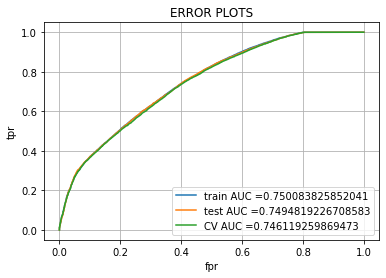

train log loss: 0.692219057805458
test log loss: 0.6922229390395587
cv log loss: 0.6922313014487768
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.68      0.83      0.75    129520
           1       0.68      0.46      0.55     96521

    accuracy                           0.68    226041
   macro avg       0.68      0.65      0.65    226041
weighted avg       0.68      0.68      0.66    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     40476
           1       0.67      0.46      0.55     3016

In [50]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=640,
                         learning_rate =0.9517580884065108,
                           algorithm='SAMME.R')

model.fit(x_train_hstack, y_train)
y_train_pred = model.predict_proba(x_train_hstack)    
y_test_pred = model.predict_proba(x_test_hstack)
y_cv_pred = model.predict_proba(x_cv_hstack)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
predict_y = model.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y,labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,labels=model.classes_, eps=1e-15))



print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, model.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, model.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, model.predict(x_cv_hstack)))


## ADABoost - Observation

* Class 1 has very low f1 and recall

# MLPClassifier

In [51]:
from sklearn.neural_network import MLPClassifier

## MLP - Hyperparameter

In [31]:
from sklearn.ensemble import AdaBoostClassifier

import optuna

from sklearn.model_selection import cross_val_score



# def objective(trial):
#     momentum = trial.suggest_float('momentum', 0.0, 1.0)
#     learning_rate_init = trial.suggest_float('learning_rate_init',
#                                              1e-5, 1e-3, log=True)
#     clf = MLPClassifier(hidden_layer_sizes=(100, 50), momentum=momentum,
#                         learning_rate_init=learning_rate_init,
#                         solver='sgd', random_state=0)
#     clf.fit(X_train, y_train)

#     return clf.score(X_test, y_test)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=3)

def objective(trial):
   
    
    momentum = trial.suggest_float('momentum', 0.0, 1.0)
    
    learning_rate_init = trial.suggest_float('learning_rate_init',
                                             1e-5, 1e-3, log=True)
    solver = trial.suggest_categorical('solver',['lbfgs', 'sgd', 'adam'])
    activation = trial.suggest_categorical('activation',['identity', 'logistic', 'tanh','relu'])
    
    rf =  MLPClassifier(hidden_layer_sizes=(300, 150,50), momentum=momentum,
                        learning_rate_init=learning_rate_init,
                        solver=solver,
                        activation=activation,random_state=0)

    score = cross_val_score(rf, x_train_hstack, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)


[I 2021-08-26 17:38:50,138] A new study created in memory with name: no-name-08c53a27-83ab-43a0-9a13-f7696f8949cd
[I 2021-08-26 17:51:27,780] Trial 0 finished with value: 0.6956419243429498 and parameters: {'momentum': 0.5032364489481191, 'learning_rate_init': 5.8915578493123787e-05, 'solver': 'lbfgs', 'activation': 'relu'}. Best is trial 0 with value: 0.6956419243429498.
[I 2021-08-26 18:27:49,698] Trial 1 finished with value: 0.8106497306587036 and parameters: {'momentum': 0.40736100718272494, 'learning_rate_init': 0.0003422909102516322, 'solver': 'adam', 'activation': 'relu'}. Best is trial 1 with value: 0.8106497306587036.
[I 2021-08-26 18:28:03,147] Trial 2 finished with value: 0.5721591895247159 and parameters: {'momentum': 0.9020919415561396, 'learning_rate_init': 0.0002917346766842177, 'solver': 'lbfgs', 'activation': 'logistic'}. Best is trial 1 with value: 0.8106497306587036.
[I 2021-08-26 18:40:51,049] Trial 3 finished with value: 0.6747528849649669 and parameters: {'momentu

In [96]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train_hstack, y_train)
clf.score(x_test_hstack, y_test)

0.722382064721969

In [32]:
# 3 trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8204599632245547
Best hyperparameters: {'momentum': 0.3145538367199382, 'learning_rate_init': 0.0008399287035238729, 'solver': 'adam', 'activation': 'relu'}


In [34]:
optuna.visualization.plot_slice(study)

## MLP - AUC Curve

## MLP - Logloss and Classification Report

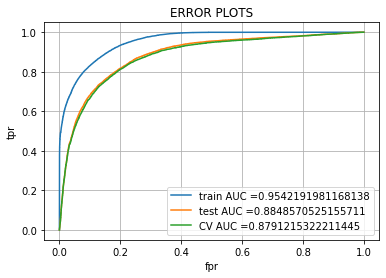

train log loss: 0.2631148932875047
test log loss: 0.6859424261720307
cv log loss: 0.7171277673136297
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.89    129520
           1       0.87      0.82      0.84     96521

    accuracy                           0.87    226041
   macro avg       0.87      0.86      0.87    226041
weighted avg       0.87      0.87      0.87    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     40476
           1       0.80      0.75      0.77     301

In [52]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(300, 150,50),
                      momentum= 0.3145538367199382,
                      learning_rate_init=0.0008399287035238729,
                      solver='adam',
                      activation='relu',
                      random_state=1)
model.fit(x_train_hstack, y_train)
y_train_pred = model.predict_proba(x_train_hstack)    
y_test_pred = model.predict_proba(x_test_hstack)
y_cv_pred = model.predict_proba(x_cv_hstack)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )



plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


predict_y = model.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y,labels=model.classes_, eps=1e-15))
predict_y = model.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,labels=model.classes_, eps=1e-15))



print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, model.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, model.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, model.predict(x_cv_hstack)))

## MLP - Observation

* Class 1 has balanced however its less than xgb

# StackingClassifier 

## Stacking models

In [13]:
from mlxtend.classifier import StackingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
clf4 = RandomForestClassifier(criterion = 'gini',
                              max_depth=32,
                              class_weight='balanced_subsample',
                              n_estimators=1883,
                              random_state=0, 
                              n_jobs=-1)
clf4.fit(x_train_hstack, y_train)
sig_clf4 = CalibratedClassifierCV(clf4, method="sigmoid")


clf6 = xgb.XGBClassifier( min_child_weight=8,
                          eta=0.19634386296489983,
                          gamma=0.0006778041910982136,
                          grow_policy='depthwise',
                          sample_type ='uniform', 
                          normalize_type='forest',
                          rate_drop = 0.914253769205017,
                          skip_drop = 0.002278123245181394,
                          max_depth=28, 
                          eval_metric='logloss',
                          random_state=0, 
                          n_jobs=-1)

clf6.fit(x_train_hstack, y_train)
sig_clf6 = CalibratedClassifierCV(clf6, method="sigmoid")

sig_clf4.fit(x_train_hstack, y_train)
#print("random forest : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf4.predict_proba(x_cv_hstack))))


sig_clf6.fit(x_train_hstack, y_train)
#print("xgboost : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf6.predict_proba(x_cv_hstack))))

[15:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_master/src/learner.cc:572: 
Parameters: { "normalize_type", "rate_drop", "sample_type", "skip_drop" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_master/src/learner.cc:572: 
Parameters: { "normalize_type", "rate_drop", "sample_type", "skip_drop" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_master/src/learner.cc:572: 
Parameters: { "normalize_type", "rate_drop", "sam

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    eta=0.19634386296489983,
                                                    eval_metric='logloss',
                                                    gamma=0.0006778041910982136,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type='gain',
                                                    interaction_constraints='',
                                                    learning_rate=0.196343869,
                                     

## MetaClassifier - Hyperparameter tunning

In [ ]:
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10]
best_alpha = 999
for i in alpha:
    print("for n_estimators =", i,)
    lr = LogisticRegression(C=i,random_state=42)
    sclf = StackingClassifier(classifiers=[sig_clf4,sig_clf6],
                              meta_classifier=lr, 
                              use_probas=True,)
    sclf.fit(x_train_hstack, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(x_cv_hstack))))
    log_error =log_loss(y_cv, sclf.predict_proba(x_cv_hstack))
    if best_alpha > log_error:
        best_alpha = log_error


## stacking classifier AUC Curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV
sclf = StackingClassifier(classifiers=[ sig_clf4,sig_clf6],
                                  meta_classifier=LogisticRegression(C=0.01,random_state=42), 
                                  use_probas=True)
sclf.fit(x_train_hstack, y_train)


y_train_pred = sclf.predict_proba(x_train_hstack)   
y_test_pred = sclf.predict_proba(x_test_hstack)
y_cv_pred = sclf.predict_proba(x_cv_hstack)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1] )

test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_test_pred[:,1] )

cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv,y_cv_pred[:,1] )



plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))



plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Stacking classifier logloss and Classification report

In [17]:
log_error = log_loss(y_train, sclf.predict_proba(x_train_hstack))
print("Log loss (train) on the stacking classifier :",log_error)
log_error = log_loss(y_test, sclf.predict_proba(x_test_hstack))
print("Log loss (test) on the stacking classifier :",log_error)
log_error = log_loss(y_cv, sclf.predict_proba(x_cv_hstack))
print("Log loss (cv) on the stacking classifier :",log_error)

print('_'*100)

print("Train missclassified point :", np.count_nonzero((sclf.predict(x_train_hstack)- y_train))/y_train.shape[0])
print("Test missclassified point :", np.count_nonzero((sclf.predict(x_test_hstack)- y_test))/y_test.shape[0])
print("cv missclassified point :", np.count_nonzero((sclf.predict(x_cv_hstack)- y_cv))/y_cv.shape[0])

print("_"*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, sclf.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, sclf.predict(x_test_hstack)))
print("-"*20,"cv Data","-"*20)
print( metrics.classification_report(y_cv, sclf.predict(x_cv_hstack)))

Log loss (train) on the stacking classifier : 0.20591535691928986
Log loss (test) on the stacking classifier : 0.33166627232005974
Log loss (cv) on the stacking classifier : 0.3295926046877468
____________________________________________________________________________________________________
Train missclassified point : 0.08217978154405617
Test missclassified point : 0.1346989623295913
cv missclassified point : 0.13409778627169933
____________________________________________________________________________________________________
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93    129520
           1       0.91      0.89      0.90     96521

    accuracy                           0

# VotingClassifier

In [14]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[ ('nb', sig_clf6),('rf', sig_clf4)], voting='soft')
vclf.fit(x_train_hstack, y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(x_train_hstack)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(x_cv_hstack)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(x_test_hstack)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(x_test_hstack)- y_test))/y_test.shape[0])
#plot_confusion_matrix(test_y=y_test, predict_y=vclf.predict(x_test_hstack))

[16:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_master/src/learner.cc:572: 
Parameters: { "normalize_type", "rate_drop", "sample_type", "skip_drop" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_master/src/learner.cc:572: 
Parameters: { "normalize_type", "rate_drop", "sample_type", "skip_drop" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:38:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_master/src/learner.cc:572: 
Parameters: { "normalize_type", "rate_drop", "sam

## VotingClassifier Logloss and Classification Report

train log loss: 0.24910545921499908
test log loss: 0.3245197577654256
cv log loss: 0.3296271374098097
                                                                                                    
........................................ Class Report ........................................
                                                                                                    
-------------------- Train Data ------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93    129520
           1       0.92      0.88      0.90     96521

    accuracy                           0.92    226041
   macro avg       0.92      0.91      0.91    226041
weighted avg       0.92      0.92      0.92    226041

-------------------- Test Data --------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     40476
           1       0.87      0.80      0.83     30

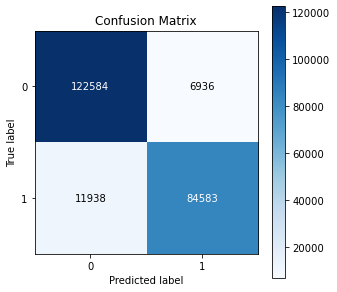

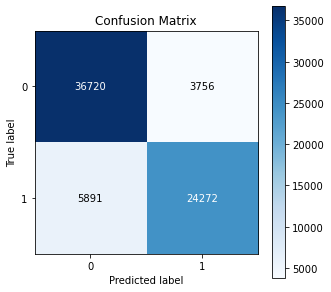

In [15]:
import scikitplot as skplt
y_pred = vclf.predict(x_train_hstack)    
y_true = y_train
skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(5,5))
import scikitplot as skplt
y_pred = vclf.predict(x_test_hstack)
y_true = y_test
skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(5,5))


predict_y = vclf.predict_proba(x_train_hstack)
print("train log loss:", log_loss(y_train, predict_y, eps=1e-15))
predict_y = vclf.predict_proba(x_test_hstack)
print("test log loss:", log_loss(y_test, predict_y, eps=1e-15))
predict_y = vclf.predict_proba(x_cv_hstack)
print("cv log loss:", log_loss(y_cv, predict_y,eps=1e-15))



print(" "*100)
print("."*40,"Class Report","."*40)
print(" "*100)
print("-"*20,"Train Data","-"*30)
print( metrics.classification_report(y_train, vclf.predict(x_train_hstack)))
print("-"*20,"Test Data","-"*20)
print( metrics.classification_report(y_test, vclf.predict(x_test_hstack)))
print("-"*20,"CV Data","-"*20)
print( metrics.classification_report(y_cv, vclf.predict(x_cv_hstack)))


# Scores

In [18]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Algo", "Train F1", "Test F1", "CV F1"])
  
# Add rows
myTable.add_row(["Random_model", "0.50", "0.50", "0.50"])
myTable.add_row(["Navie", "0.60", "0.59", "0.59"])
myTable.add_row(["K-nn", "0.", "A", "90.23 %"])
myTable.add_row(["LR", "0.60", "0.60", "0.49"])
myTable.add_row(["svm", "0.58", "0.58", "0.58"])
myTable.add_row(["CART", "0.73", "0.71", "0.71"])
myTable.add_row(["CATBOOST", "0.73", "0.70", "0.70"])
myTable.add_row(["RF", "0.91", "0.85", "0.85"])
myTable.add_row(["ada", "0.65", "0.65", "0.64"])
myTable.add_row(["MLP", "0.91", "0.79", "0.79"])
myTable.add_row(["xgb", "0.87", "0.81", "0.81"])
myTable.add_row(["Lightxgb", "0.72", "0.70", "0.70"])  
myTable.add_row(["Stacking", "0.92", "0.86", "0.86"])  
myTable.add_row(["Voting", "0.92", "0.86", "0.86"])
print(myTable)

+--------------+----------+---------+---------+
|     Algo     | Train F1 | Test F1 |  CV F1  |
+--------------+----------+---------+---------+
| Random_model |   0.50   |   0.50  |   0.50  |
|    Navie     |   0.60   |   0.59  |   0.59  |
|     K-nn     |    0.    |    A    | 90.23 % |
|      LR      |   0.60   |   0.60  |   0.49  |
|     svm      |   0.58   |   0.58  |   0.58  |
|     CART     |   0.73   |   0.71  |   0.71  |
|   CATBOOST   |   0.73   |   0.70  |   0.70  |
|      RF      |   0.91   |   0.85  |   0.85  |
|     ada      |   0.65   |   0.65  |   0.64  |
|     MLP      |   0.91   |   0.79  |   0.79  |
|     xgb      |   0.87   |   0.81  |   0.81  |
|   Lightxgb   |   0.72   |   0.70  |   0.70  |
|   Stacking   |   0.92   |   0.86  |   0.86  |
|    Voting    |   0.92   |   0.86  |   0.86  |
+--------------+----------+---------+---------+
